# **1. LOAD DATA**

Sumber data diperoleh dari :   
https://docs.google.com/spreadsheets/d/1d6HT_-HF6cuXQ8_rvwqnHRBxtypuMkOXh-r3P2l8sTM/edit#gid=353761410

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# google drive authentication
from google.colab import drive, auth

# google sheet aunthetication
from google.auth import default

# spreadsheet
import gspread as gd

# pandas
import pandas as pd

# menghbungkan google drive dan google sheet
drive.mount('/content/drive')
auth.authenticate_user()
creds,_ = default()
gc = gd.authorize(creds)

# buka file spreadsheet pada drive
totalresi = gc.open('PROGRESS RESI MARKETPLACE').worksheet('TOTAL RESI')

# ambil all values dari sheet
data = totalresi.get_all_values()

# ubah menjadi dataframe
df = pd.DataFrame(data[1:], columns=data[0])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df

,PRIMARY KEY,SCAN RESI,MARKETPLACE,TGL CHECK IN,TGL CHECK OUT,TGL PICKING,TANGGAL ORDER,BATAS KIRIM,PICKING,PACKING,...,STATUS,PENDING CHECK OUT\n(HARI INI - CHECK IN),DURASI CHECK IN\n(ORDER TO CHECK IN),DURASI PICKING\n(CHECK IN TO PICKING),DURASI IDLE\n(PICKING TO CHECK OUT),DURASI PESANAN\n(ORDER TO CHECK OUT),KETERLAMBATAN\n(BATAS KIRIM TO CHECK OUT),SLA PESANAN,STATUS MARKETPLACE,BULAN
0,CI-00001,TLJR35U9UKM7F1MQ,TOKOPEDIA,31-Jul-2023,31-Jul-2023,31-Jul-2023,31-Jul-2023,3-Aug-2023,Ariq,Ahmad,...,CHECK OUT,,0,0,0,0,-3,EXPECTED,,Jul-2023
1,CI-00002,TLJR3DJPLCM7F1MQ,TOKOPEDIA,31-Jul-2023,31-Jul-2023,31-Jul-2023,31-Jul-2023,3-Aug-2023,Ariq,Ahmad,...,CHECK OUT,,0,0,0,0,-3,EXPECTED,,Jul-2023
2,CI-00003,TLJC3DE0W5M7F1MQ,TOKOPEDIA,31-Jul-2023,31-Jul-2023,31-Jul-2023,31-Jul-2023,3-Aug-2023,Ariq,Ahmad,...,CHECK OUT,,0,0,0,0,-3,EXPECTED,,Jul-2023
3,CI-00004,CM47662426618,SHOPEE,31-Jul-2023,31-Jul-2023,31-Jul-2023,31-Jul-2023,3-Aug-2023,Ariq,Ahmad,...,CHECK OUT,,0,0,0,0,-3,EXPECTED,,Jul-2023
4,CI-00005,TLJR3DL6N1M7F1MQ,TOKOPEDIA,31-Jul-2023,31-Jul-2023,31-Jul-2023,31-Jul-2023,3-Aug-2023,Ariq,Ahmad,...,CHECK OUT,,0,0,0,0,-3,EXPECTED,,Jul-2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16390,CI-16391,SPXID035151097148,SHOPEE,25-Aug-2023,,25-Aug-2023,25-Aug-2023,29-Aug-2023,Ahmad,,...,CHECK IN,-2,0,,,,,#DIV/0!,Siap Kirim,Aug-2023
16391,CI-16392,SPXID035407945608,SHOPEE,25-Aug-2023,,25-Aug-2023,25-Aug-2023,29-Aug-2023,Ahmad,,...,CHECK IN,-2,0,,,,,#DIV/0!,Siap Kirim,Aug-2023
16392,CI-16393,SPXID036490228668,SHOPEE,25-Aug-2023,,25-Aug-2023,25-Aug-2023,29-Aug-2023,Ahmad,,...,CHECK IN,-2,0,,,,,#DIV/0!,Siap Kirim,Aug-2023
16393,CI-16394,SPXID035657387348,SHOPEE,25-Aug-2023,,25-Aug-2023,25-Aug-2023,29-Aug-2023,Ahmad,,...,CHECK IN,-2,0,,,,,#DIV/0!,Siap Kirim,Aug-2023


In [ ]:
# ubah kolom tanggal menjadi datetype
date_columns = ['TGL CHECK IN', 'TGL CHECK OUT', 'TGL PICKING', 'BATAS KIRIM', 'TANGGAL ORDER']

for col in date_columns:
    df[col] = pd.to_datetime(df[col], format='%d-%b-%Y', errors='coerce')

df['TANGGAL ORDER'] = pd.to_datetime(df['TANGGAL ORDER'])

In [ ]:
df

,PRIMARY KEY,SCAN RESI,MARKETPLACE,TGL CHECK IN,TGL CHECK OUT,TGL PICKING,TANGGAL ORDER,BATAS KIRIM,PICKING,PACKING,...,STATUS,PENDING CHECK OUT\n(HARI INI - CHECK IN),DURASI CHECK IN\n(ORDER TO CHECK IN),DURASI PICKING\n(CHECK IN TO PICKING),DURASI IDLE\n(PICKING TO CHECK OUT),DURASI PESANAN\n(ORDER TO CHECK OUT),KETERLAMBATAN\n(BATAS KIRIM TO CHECK OUT),SLA PESANAN,STATUS MARKETPLACE,BULAN
0,CI-00001,TLJR35U9UKM7F1MQ,TOKOPEDIA,2023-07-31,2023-07-31,2023-07-31,2023-07-31,2023-08-03,Ariq,Ahmad,...,CHECK OUT,,0,0,0,0,-3,EXPECTED,,Jul-2023
1,CI-00002,TLJR3DJPLCM7F1MQ,TOKOPEDIA,2023-07-31,2023-07-31,2023-07-31,2023-07-31,2023-08-03,Ariq,Ahmad,...,CHECK OUT,,0,0,0,0,-3,EXPECTED,,Jul-2023
2,CI-00003,TLJC3DE0W5M7F1MQ,TOKOPEDIA,2023-07-31,2023-07-31,2023-07-31,2023-07-31,2023-08-03,Ariq,Ahmad,...,CHECK OUT,,0,0,0,0,-3,EXPECTED,,Jul-2023
3,CI-00004,CM47662426618,SHOPEE,2023-07-31,2023-07-31,2023-07-31,2023-07-31,2023-08-03,Ariq,Ahmad,...,CHECK OUT,,0,0,0,0,-3,EXPECTED,,Jul-2023
4,CI-00005,TLJR3DL6N1M7F1MQ,TOKOPEDIA,2023-07-31,2023-07-31,2023-07-31,2023-07-31,2023-08-03,Ariq,Ahmad,...,CHECK OUT,,0,0,0,0,-3,EXPECTED,,Jul-2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16390,CI-16391,SPXID035151097148,SHOPEE,2023-08-25,NaT,2023-08-25,2023-08-25,2023-08-29,Ahmad,,...,CHECK IN,-2,0,,,,,#DIV/0!,Siap Kirim,Aug-2023
16391,CI-16392,SPXID035407945608,SHOPEE,2023-08-25,NaT,2023-08-25,2023-08-25,2023-08-29,Ahmad,,...,CHECK IN,-2,0,,,,,#DIV/0!,Siap Kirim,Aug-2023
16392,CI-16393,SPXID036490228668,SHOPEE,2023-08-25,NaT,2023-08-25,2023-08-25,2023-08-29,Ahmad,,...,CHECK IN,-2,0,,,,,#DIV/0!,Siap Kirim,Aug-2023
16393,CI-16394,SPXID035657387348,SHOPEE,2023-08-25,NaT,2023-08-25,2023-08-25,2023-08-29,Ahmad,,...,CHECK IN,-2,0,,,,,#DIV/0!,Siap Kirim,Aug-2023


# **2. EXPLORATORY DATA ANALYSIS**

## TIMELINE RESI

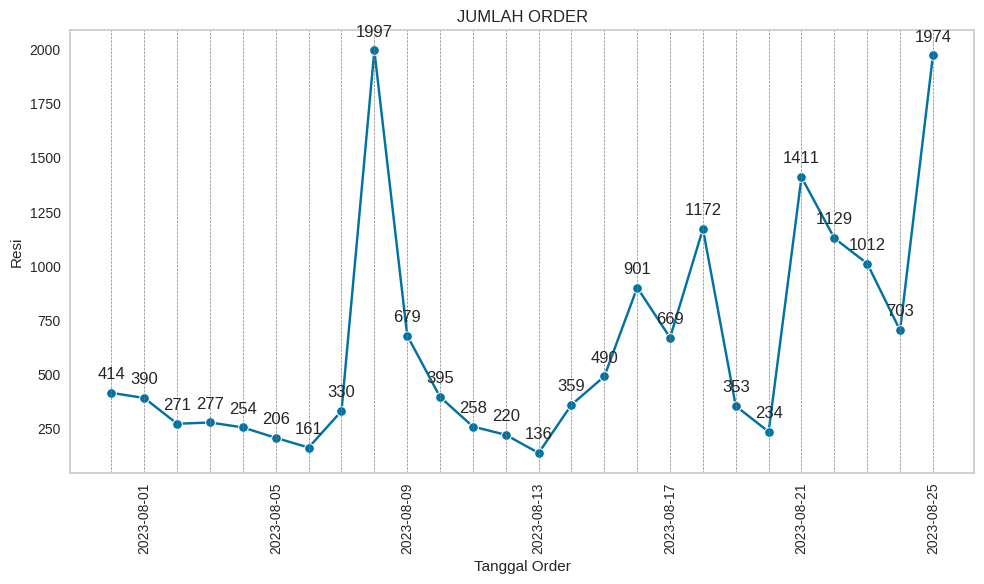

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'TANGGAL ORDER' to datetime
df['TANGGAL ORDER'] = pd.to_datetime(df['TANGGAL ORDER'])

# Group by date and count the number of unique dates
tgl_order = df.groupby('TANGGAL ORDER').size().reset_index(name='COUNT')

# Create line plot using Seaborn lineplot with style parameter
plt.figure(figsize=(10, 6))
sns.lineplot(data=tgl_order, x='TANGGAL ORDER', y='COUNT', marker='o')
plt.title('JUMLAH ORDER')
plt.xlabel('Tanggal Order')
plt.ylabel('Resi')
plt.xticks(rotation=90)
plt.tight_layout()

# Adding number labels at each data point
for i, row in tgl_order.iterrows():
    plt.annotate(row['COUNT'], (row['TANGGAL ORDER'], row['COUNT']),
                 textcoords="offset points", xytext=(0,10), ha='center')

# Add vertical grid lines for each data point
for date in tgl_order['TANGGAL ORDER']:
    plt.axvline(date, color='gray', linestyle='dashed', linewidth=0.5)

plt.grid()
plt.show()

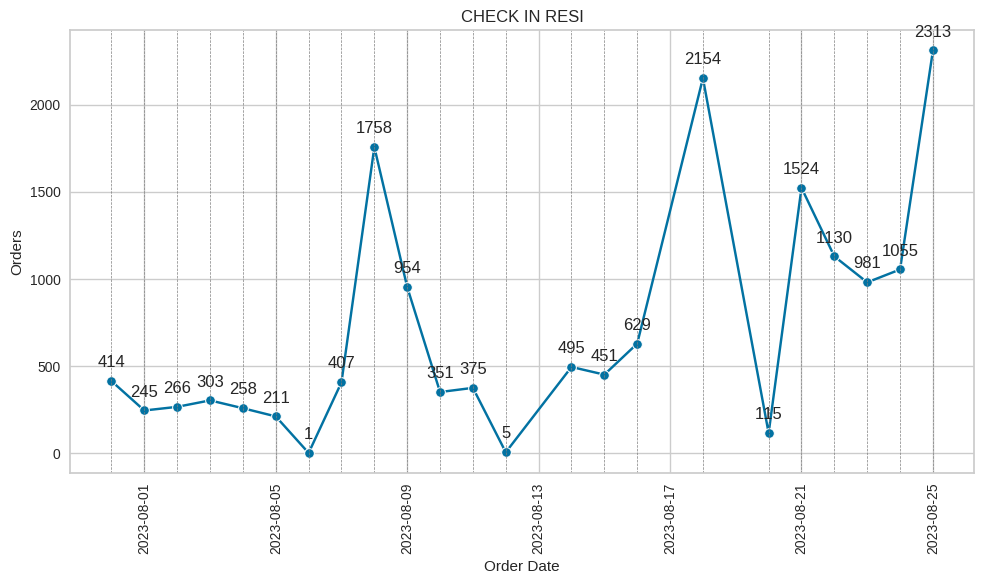

In [ ]:
# Convert 'TGL CHECK IN' to datetime
df['TGL CHECK IN'] = pd.to_datetime(df['TGL CHECK IN'])

# Group by date and count the number of unique dates
tgl_ci = df.groupby('TGL CHECK IN').size().reset_index(name='COUNT')

# Create line plot using Seaborn lineplot with style parameter
plt.figure(figsize=(10, 6))
sns.lineplot(data=tgl_ci, x='TGL CHECK IN', y='COUNT', marker='o')
plt.title('CHECK IN RESI')
plt.xlabel('Order Date')
plt.ylabel('Orders')
plt.xticks(rotation=90)
plt.tight_layout()

# Adding number labels at each data point
for i, row in tgl_ci.iterrows():
    plt.annotate(row['COUNT'], (row['TGL CHECK IN'], row['COUNT']),
                 textcoords="offset points", xytext=(0,10), ha='center')

# Add vertical grid lines for each data point
for date in tgl_ci['TGL CHECK IN']:
    plt.axvline(date, color='gray', linestyle='dashed', linewidth=0.5)

plt.show()

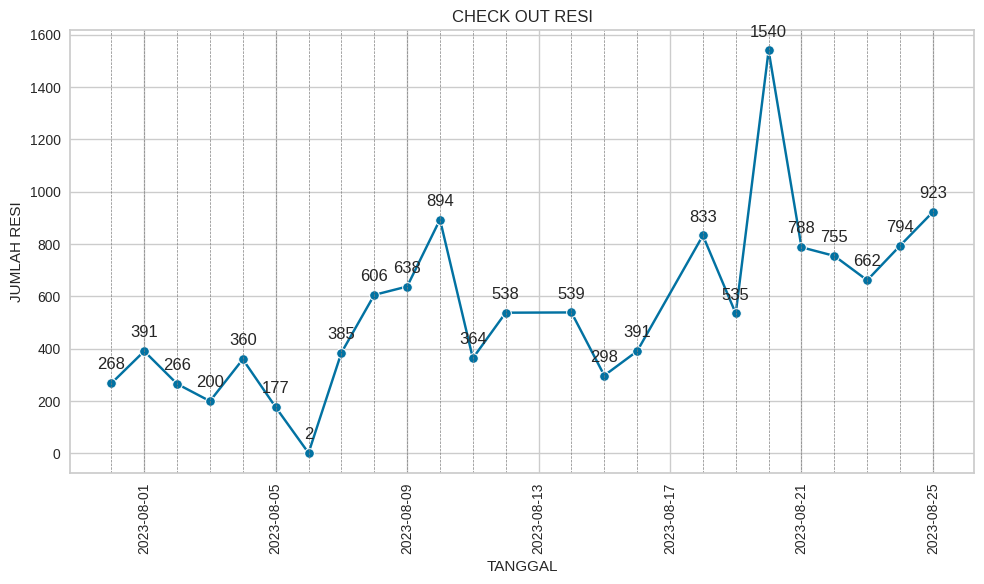

In [ ]:
# Convert 'TGL CHECK OUT' to datetime
df['TGL CHECK OUT'] = pd.to_datetime(df['TGL CHECK OUT'])

# Group by date and count the number of unique dates
tgl_co = df.groupby('TGL CHECK OUT').size().reset_index(name='COUNT')

# Create line plot using Seaborn lineplot with style parameter
plt.figure(figsize=(10, 6))
sns.lineplot(data=tgl_co, x='TGL CHECK OUT', y='COUNT', marker='o')
plt.title('CHECK OUT RESI')
plt.xlabel('TANGGAL')
plt.ylabel('JUMLAH RESI')
plt.xticks(rotation=90)
plt.tight_layout()

# Adding number labels at each data point
for i, row in tgl_co.iterrows():
    plt.annotate(row['COUNT'], (row['TGL CHECK OUT'], row['COUNT']),
                 textcoords="offset points", xytext=(0,10), ha='center')

# Add vertical grid lines for each data point
for date in tgl_co['TGL CHECK OUT']:
    plt.axvline(date, color='gray', linestyle='dashed', linewidth=0.5)

plt.show()

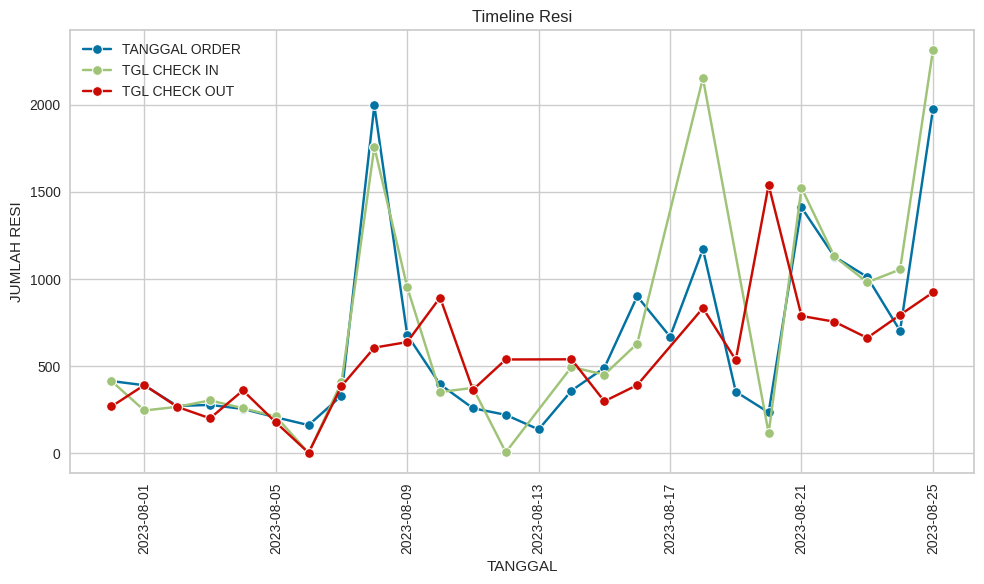

In [ ]:
# Convert date columns to datetime
df['TANGGAL ORDER'] = pd.to_datetime(df['TANGGAL ORDER'])
df['TGL CHECK IN'] = pd.to_datetime(df['TGL CHECK IN'])
df['TGL CHECK OUT'] = pd.to_datetime(df['TGL CHECK OUT'])

# Group by date and count the number of unique dates for each event
tgl_order = df.groupby('TANGGAL ORDER').size().reset_index(name='COUNT')
tgl_ci = df.groupby('TGL CHECK IN').size().reset_index(name='COUNT')
tgl_co = df.groupby('TGL CHECK OUT').size().reset_index(name='COUNT')

# Create line plot using Seaborn lineplot with style parameter
plt.figure(figsize=(10, 6))

# Line plot for TANGGAL ORDER
sns.lineplot(data=tgl_order, x='TANGGAL ORDER', y='COUNT', marker='o', label='TANGGAL ORDER')

# Line plot for TGL CHECK IN
sns.lineplot(data=tgl_ci, x='TGL CHECK IN', y='COUNT', marker='o', label='TGL CHECK IN')

# Line plot for TGL CHECK OUT
sns.lineplot(data=tgl_co, x='TGL CHECK OUT', y='COUNT', marker='o', label='TGL CHECK OUT')

plt.title('Timeline Resi')
plt.xlabel('TANGGAL')
plt.ylabel('JUMLAH RESI')
plt.xticks(rotation=90)
plt.tight_layout()

plt.legend()  # Show legend to differentiate the lines
plt.grid(True)

plt.show()

In [ ]:
tgl_order = tgl_order.rename(columns={'TANGGAL ORDER' : 'TANGGAL', 'COUNT' : 'JUMLAH ORDER'})
tgl_ci = tgl_ci.rename(columns={'TGL CHECK IN' : 'TANGGAL', 'COUNT' : 'JUMLAH CHECK IN'})
tgl_co = tgl_co.rename(columns={'TGL CHECK OUT' : 'TANGGAL', 'COUNT' : 'JUMLAH CHECK OUT'})

timeline_resi = pd.concat([tgl_order, tgl_ci[['JUMLAH CHECK IN']], tgl_co[['JUMLAH CHECK OUT']]], axis=1)

In [ ]:
timeline_resi

,TANGGAL,JUMLAH ORDER,JUMLAH CHECK IN,JUMLAH CHECK OUT
0,2023-07-31,414,414.0,268.0
1,2023-08-01,390,245.0,391.0
2,2023-08-02,271,266.0,266.0
3,2023-08-03,277,303.0,200.0
4,2023-08-04,254,258.0,360.0
5,2023-08-05,206,211.0,177.0
6,2023-08-06,161,1.0,2.0
7,2023-08-07,330,407.0,385.0
8,2023-08-08,1997,1758.0,606.0
9,2023-08-09,679,954.0,638.0


Dari tabel yang diberikan, kita dapat melihat beberapa tren dan pola terkait dengan jumlah order, check in resi, dan check out resi. Mari kita analisis lebih lanjut:

**1. Jumlah Order:**

  Jumlah order memiliki fluktuasi harian yang cukup signifikan. Misalnya, ada hari di mana jumlah order sangat tinggi (seperti tanggal 8, 16, dan 21 Agustus), dan ada juga hari di mana jumlah order relatif rendah (seperti tanggal 6, 12, dan 20 Agustus).
  Secara keseluruhan, terlihat adanya variasi harian dalam jumlah order, namun tidak ada tren jelas yang dapat diidentifikasi.

**2. Jumlah Check In Resi:**

  Jumlah check in resi juga memiliki fluktuasi harian yang bervariasi. Ada beberapa hari di mana jumlah check in resi jauh lebih tinggi dari yang lain (seperti tanggal 8, 16, dan 22 Agustus), dan ada juga hari dengan jumlah yang sangat rendah (seperti tanggal 6 dan 17 Agustus).
  Beberapa hari memiliki jumlah check in resi yang sangat tinggi dibandingkan dengan jumlah order pada hari itu. Ini bisa menunjukkan bahwa beberapa pengiriman mungkin mengalami keterlambatan dalam proses check in.

**3. Jumlah Check Out Resi:**

  Pola jumlah check out resi mirip dengan jumlah check in resi, tetapi ada beberapa perbedaan. Terdapat hari-hari dengan jumlah check out resi yang signifikan (seperti tanggal 8, 16, dan 18 Agustus), dan beberapa hari dengan jumlah yang lebih rendah (seperti tanggal 6 dan 12 Agustus).
  Pada beberapa hari, jumlah check out resi bisa melebihi jumlah order pada hari itu. Ini dapat menunjukkan adanya penumpukan paket yang perlu diproses.  

Dalam analisis ini, kita melihat fluktuasi harian yang signifikan dalam jumlah order, check in resi, dan check out resi. Namun, tidak ada tren jangka panjang yang jelas yang dapat diidentifikasi dari data yang diberikan. Juga, perlu dicatat bahwa adanya variasi yang besar antara jumlah order dan jumlah check in/check out pada beberapa hari mungkin menunjukkan adanya masalah dalam manajemen operasional yang perlu ditinjau lebih lanjut untuk memastikan kelancaran proses pengiriman.

Dalam situasi di mana jumlah check out resi lebih rendah daripada jumlah order dan jumlah check in, ada beberapa hal yang mungkin dapat diindikasikan. Ini dapat menggambarkan beberapa potensi masalah atau ketidakseimbangan dalam proses operasional pengiriman atau pengelolaan stok. Berikut adalah beberapa analisis yang mungkin relevan:

1. Keterlambatan Pemrosesan:  
Jika jumlah check out resi jauh lebih rendah daripada jumlah order dan check in, ini bisa menunjukkan adanya keterlambatan dalam pemrosesan pesanan. Ini mungkin terjadi karena kendala logistik, kesalahan dalam proses, atau kurangnya sumber daya yang cukup untuk memproses pesanan dengan cepat.

2. Stok Tidak Tersedia:   
Jika check out resi lebih rendah, ini bisa mengindikasikan bahwa stok barang atau produk yang dipesan mungkin tidak tersedia. Hal ini bisa disebabkan oleh masalah pasokan, kehabisan stok, atau masalah dalam mengelola inventaris.

3. Masalah Kualitas atau Inspeksi:  
Jumlah check out resi yang lebih rendah bisa menandakan adanya peningkatan dalam pemeriksaan kualitas atau proses inspeksi sebelum pengiriman. Jika banyak stok produk yang kurang atau kecacatan produk, maka hal ini dapat menyebabkan penundaan dalam pengiriman.

4. Ketidakseimbangan Operasional:  
Potensi ketidakseimbangan antara departemen yang berbeda dalam rantai pasok dapat menyebabkan perbedaan antara jumlah order, check in, dan check out. Misalnya, mungkin ada kekurangan stok di gudang, proses pengiriman terhambat karena kurangnya kendaraan atau tenaga kerja untuk melakukan operasional harian.

5. Masalah Teknis atau Sistem:  
Kesalahan teknis dalam sistem yang digunakan untuk memproses pesanan dan pengiriman juga bisa menyebabkan perbedaan antara jumlah check out resi dan jumlah order/check in. Ini dapat melibatkan masalah dalam pelacakan atau pencatatan data.

6. Pengembalian atau Pembatalan Pesanan:  
Jumlah check out resi yang lebih rendah bisa mencerminkan adanya pengembalian atau pembatalan pesanan oleh pelanggan setelah proses check in, tetapi sebelum pengiriman selesai.

7. Kesalahan operasional:  
Kesalahan manusia seperti salah mencatat, memasukkan data, atau proses pencatatan yang kurang akurat juga dapat menyebabkan perbedaan antara jumlah check out resi dan jumlah order/check in.

Dalam analisa ini, penting untuk menganalisis lebih lanjut dan mengidentifikasi penyebab yang mendasari perbedaan antara jumlah check out resi, jumlah order, dan jumlah check in. Dengan memahami penyebab tersebut, langkah-langkah perbaikan dan peningkatan operasional dapat diambil untuk memastikan efisiensi dan kepuasan pelanggan yang lebih baik.

In [ ]:
timeline_resi.describe().round().T

,count,mean,std,min,25%,50%,75%,max
JUMLAH ORDER,26.0,631.0,528.0,136.0,261.0,392.0,852.0,1997.0
JUMLAH CHECK IN,23.0,713.0,666.0,1.0,262.0,414.0,1018.0,2313.0
JUMLAH CHECK OUT,24.0,548.0,325.0,2.0,344.0,536.0,763.0,1540.0


1. Jumlah Order memiliki rata-rata sekitar 631 dengan variasi yang cukup besar (standar deviasi 528), yang menunjukkan fluktuasi yang signifikan dalam jumlah order setiap harinya.

2. Jumlah Check In memiliki rata-rata yang lebih tinggi, yaitu sekitar 713, dengan standar deviasi yang juga tinggi (666). Hal ini mengindikasikan bahwa dalam beberapa hari, terdapat peningkatan yang signifikan dalam proses check in resi.

3. Jumlah Check Out memiliki rata-rata sekitar 548, dengan standar deviasi 325. Standar deviasi yang lebih rendah ini menunjukkan variasi yang lebih rendah dibandingkan dengan variabel lainnya.

Ketika kita membandingkan nilai median (kuartil 50%) dari ketiga variabel ini, kita melihat bahwa Jumlah Check In (414) lebih rendah daripada Jumlah Order (392), dan Jumlah Check Out (536) lebih tinggi daripada keduanya. Ini konsisten dengan observasi sebelumnya bahwa ada perbedaan antara jumlah check in dan check out dengan jumlah order pada beberapa hari.

Dalam analisis sebelumnya, kita telah menyimpulkan bahwa ada fluktuasi harian yang signifikan dan ketidakseimbangan dalam proses operasional. Informasi statistik ini mengukuhkan temuan tersebut dengan memberikan pandangan lebih mendalam tentang variabilitas dan karakteristik distribusi dari data. Dengan mempertimbangkan kedua analisis ini bersama-sama, dapat diambil tindakan untuk mengatasi masalah-masalah operasional yang mungkin ada dan meningkatkan efisiensi dalam proses pengiriman

## DATAFRAME CHECK OUT

In [ ]:
df_co = df[df['STATUS'] == 'CHECK OUT']

In [ ]:
df_co

,PRIMARY KEY,SCAN RESI,MARKETPLACE,TGL CHECK IN,TGL CHECK OUT,TGL PICKING,TANGGAL ORDER,BATAS KIRIM,PICKING,PACKING,...,STATUS,PENDING CHECK OUT\n(HARI INI - CHECK IN),DURASI CHECK IN\n(ORDER TO CHECK IN),DURASI PICKING\n(CHECK IN TO PICKING),DURASI IDLE\n(PICKING TO CHECK OUT),DURASI PESANAN\n(ORDER TO CHECK OUT),KETERLAMBATAN\n(BATAS KIRIM TO CHECK OUT),SLA PESANAN,STATUS MARKETPLACE,BULAN
0,CI-00001,TLJR35U9UKM7F1MQ,TOKOPEDIA,2023-07-31,2023-07-31,2023-07-31,2023-07-31,2023-08-03,Ariq,Ahmad,...,CHECK OUT,,0,0,0,0,-3,EXPECTED,,Jul-2023
1,CI-00002,TLJR3DJPLCM7F1MQ,TOKOPEDIA,2023-07-31,2023-07-31,2023-07-31,2023-07-31,2023-08-03,Ariq,Ahmad,...,CHECK OUT,,0,0,0,0,-3,EXPECTED,,Jul-2023
2,CI-00003,TLJC3DE0W5M7F1MQ,TOKOPEDIA,2023-07-31,2023-07-31,2023-07-31,2023-07-31,2023-08-03,Ariq,Ahmad,...,CHECK OUT,,0,0,0,0,-3,EXPECTED,,Jul-2023
3,CI-00004,CM47662426618,SHOPEE,2023-07-31,2023-07-31,2023-07-31,2023-07-31,2023-08-03,Ariq,Ahmad,...,CHECK OUT,,0,0,0,0,-3,EXPECTED,,Jul-2023
4,CI-00005,TLJR3DL6N1M7F1MQ,TOKOPEDIA,2023-07-31,2023-07-31,2023-07-31,2023-07-31,2023-08-03,Ariq,Ahmad,...,CHECK OUT,,0,0,0,0,-3,EXPECTED,,Jul-2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16243,CI-16244,230825JNNEXXC1,SHOPEE,2023-08-25,2023-08-25,2023-08-25,2023-08-25,2023-08-28,Ahmad,Derio,...,CHECK OUT,,0,0,0,0,-3,EXPECTED,Dalam Pengiriman,Aug-2023
16244,CI-16245,230825JJK2WJ6E,SHOPEE,2023-08-25,2023-08-25,2023-08-25,2023-08-25,2023-08-28,Ahmad,Derio,...,CHECK OUT,,0,0,0,0,-3,EXPECTED,Dalam Pengiriman,Aug-2023
16245,CI-16246,230825JJF7WX85,SHOPEE,2023-08-25,2023-08-25,2023-08-25,2023-08-25,2023-08-28,Ahmad,Derio,...,CHECK OUT,,0,0,0,0,-3,EXPECTED,Dalam Pengiriman,Aug-2023
16246,CI-16247,230825JHXA5MVK,SHOPEE,2023-08-25,2023-08-25,2023-08-25,2023-08-25,2023-08-28,Ahmad,Derio,...,CHECK OUT,,0,0,0,0,-3,EXPECTED,Dalam Pengiriman,Aug-2023


In [ ]:
df_co = df_co[['PRIMARY KEY',
 'SCAN RESI',
 'MARKETPLACE',
 'TGL CHECK IN',
 'TGL CHECK OUT',
 'TGL PICKING',
 'TANGGAL ORDER',
 'BATAS KIRIM',
 'PICKING',
 'PACKING',
  'SLA PROSES',
  'SLA PESANAN',
 'DURASI PROSES\n(CHECK IN TO CHECK OUT)',
 'DURASI CHECK IN\n(ORDER TO CHECK IN)',
 'DURASI PICKING\n(CHECK IN TO PICKING)',
 'DURASI IDLE\n(PICKING TO CHECK OUT)',
 'DURASI PESANAN\n(ORDER TO CHECK OUT)',
 'KETERLAMBATAN\n(BATAS KIRIM TO CHECK OUT)']]

# rename kolom
new_column_names = {
    'DURASI PROSES\n(CHECK IN TO CHECK OUT)' : 'DURASI PROSES',
    'DURASI CHECK IN\n(ORDER TO CHECK IN)': 'DURASI CHECK IN',
    'DURASI PICKING\n(CHECK IN TO PICKING)': 'DURASI PICKING',
    'DURASI IDLE\n(PICKING TO CHECK OUT)': 'DURASI IDLE',
    'DURASI PESANAN\n(ORDER TO CHECK OUT)': 'DURASI PESANAN',
    'KETERLAMBATAN\n(BATAS KIRIM TO CHECK OUT)': 'KETERLAMBATAN'
}

df_co.rename(columns=new_column_names, inplace=True)

<ipython-input-427-e4b9c6d619c0>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_co.rename(columns=new_column_names, inplace=True)


In [ ]:
df_co.dtypes

PRIMARY KEY                object
SCAN RESI                  object
MARKETPLACE                object
TGL CHECK IN       datetime64[ns]
TGL CHECK OUT      datetime64[ns]
TGL PICKING        datetime64[ns]
TANGGAL ORDER      datetime64[ns]
BATAS KIRIM        datetime64[ns]
PICKING                    object
PACKING                    object
SLA PROSES                 object
SLA PESANAN                object
DURASI PROSES              object
DURASI CHECK IN            object
DURASI PICKING             object
DURASI IDLE                object
DURASI PESANAN             object
KETERLAMBATAN              object
dtype: object

In [ ]:
columns_to_convert = ['DURASI PROSES', 'DURASI CHECK IN', 'DURASI PICKING', 'DURASI IDLE', 'DURASI PESANAN', 'KETERLAMBATAN']

# Drop rows with non-numeric values in specified columns
df_co = df_co.dropna(subset=columns_to_convert)

# Convert remaining columns to integers
df_co[columns_to_convert] = df_co[columns_to_convert].astype(int)


In [ ]:
# n unique variable

df_co.select_dtypes(include='object').nunique()

PRIMARY KEY    13147
SCAN RESI      13147
MARKETPLACE        6
PICKING            3
PACKING            5
SLA PROSES         2
SLA PESANAN        2
dtype: int64

In [ ]:
# n unique variable

df_co.select_dtypes(exclude='object').nunique()

TGL CHECK IN       23
TGL CHECK OUT      24
TGL PICKING        25
TANGGAL ORDER      26
BATAS KIRIM        30
DURASI PROSES       9
DURASI CHECK IN     7
DURASI PICKING     11
DURASI IDLE        10
DURASI PESANAN     12
KETERLAMBATAN      19
dtype: int64

In [ ]:
# semua unique value pada type object
for column in df_co.select_dtypes(include='object'):
    unique_values = df_co[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print()

Unique values in 'PRIMARY KEY':
['CI-00001' 'CI-00002' 'CI-00003' ... 'CI-16246' 'CI-16247' 'CI-16248']

Unique values in 'SCAN RESI':
['TLJR35U9UKM7F1MQ' 'TLJR3DJPLCM7F1MQ' 'TLJC3DE0W5M7F1MQ' ...
 '230825JJF7WX85' '230825JHXA5MVK' '230825JF2QK8QE']

Unique values in 'MARKETPLACE':
['TOKOPEDIA' 'SHOPEE' 'LAZADA' 'TIKTOK MCN' 'BLIBLI' 'TIKTOK GAGA']

Unique values in 'PICKING':
['Ariq' 'Ahmad' 'Nana']

Unique values in 'PACKING':
['Ahmad' 'Nana' 'Derio' 'Putra' 'Ariq']

Unique values in 'SLA PROSES':
['EXPECTED' 'BELOW']

Unique values in 'SLA PESANAN':
['EXPECTED' 'BELOW']



In [ ]:
df_co.columns.tolist()

['PRIMARY KEY',
 'SCAN RESI',
 'MARKETPLACE',
 'TGL CHECK IN',
 'TGL CHECK OUT',
 'TGL PICKING',
 'TANGGAL ORDER',
 'BATAS KIRIM',
 'PICKING',
 'PACKING',
 'SLA PROSES',
 'SLA PESANAN',
 'DURASI PROSES',
 'DURASI CHECK IN',
 'DURASI PICKING',
 'DURASI IDLE',
 'DURASI PESANAN',
 'KETERLAMBATAN']

In [ ]:
df_checkout = df_co[[
 'MARKETPLACE',
 'TGL CHECK IN',
 'TGL CHECK OUT',
 'TGL PICKING',
 'TANGGAL ORDER',
 'BATAS KIRIM',
 'PICKING',
 'PACKING',
 'SLA PROSES',
 'SLA PESANAN',
 'DURASI PROSES',
 'DURASI CHECK IN',
 'DURASI PICKING',
 'DURASI IDLE',
 'DURASI PESANAN',
 'KETERLAMBATAN']]

In [ ]:
df_checkout.dtypes

MARKETPLACE                object
TGL CHECK IN       datetime64[ns]
TGL CHECK OUT      datetime64[ns]
TGL PICKING        datetime64[ns]
TANGGAL ORDER      datetime64[ns]
BATAS KIRIM        datetime64[ns]
PICKING                    object
PACKING                    object
SLA PROSES                 object
SLA PESANAN                object
DURASI PROSES               int64
DURASI CHECK IN             int64
DURASI PICKING              int64
DURASI IDLE                 int64
DURASI PESANAN              int64
KETERLAMBATAN               int64
dtype: object

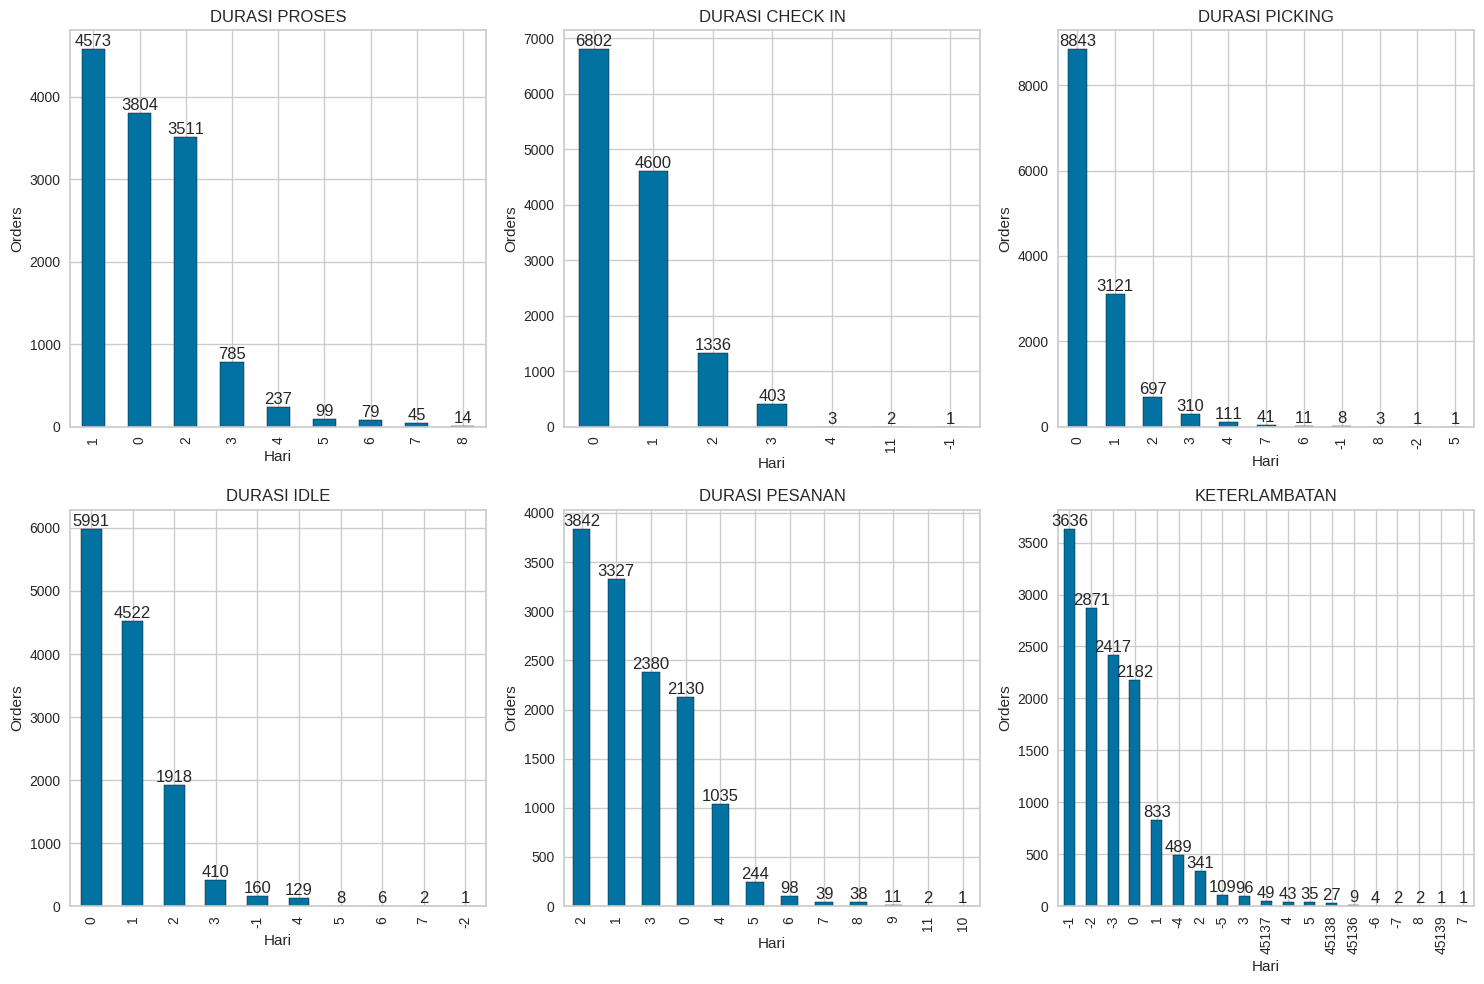

In [ ]:
# Select only the int64 columns
numeric_columns = df_checkout.select_dtypes(include=['int64'])

# Plotting bar plots for value_counts() of specified columns
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for ax, column in zip(axes.flatten(), numeric_columns.columns):
    value_counts = df_checkout[column].value_counts()
    bars = value_counts.plot(kind='bar', ax=ax, edgecolor='black')
    ax.set_title(column)
    ax.set_xlabel('Hari')
    ax.set_ylabel('Orders')

    # Add text labels on top of bars
    for bar in bars.patches:
        bar_height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, bar_height, str(int(bar_height)), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
df_checkout.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
DURASI PROSES,13147.0,1.24,1.16,0.0,0.0,1.0,2.0,8.0
DURASI CHECK IN,13147.0,0.65,0.80,-1.0,0.0,0.0,1.0,11.0
DURASI PICKING,13147.0,0.48,0.88,-2.0,0.0,0.0,1.0,8.0
DURASI IDLE,13147.0,0.76,0.91,-2.0,0.0,1.0,1.0,7.0
DURASI PESANAN,13147.0,1.89,1.38,0.0,1.0,2.0,3.0,11.0
KETERLAMBATAN,13147.0,293.97,3638.94,-7.0,-2.0,-1.0,0.0,45139.0


Tabel tersebut berisi ringkasan statistik untuk beberapa variabel terkait durasi dan keterlambatan dalam kegiatan operasional warehouse ecommerce di PT. Jakarana Tama. Setiap variabel memiliki statistik yang menggambarkan distribusi dan variasi data di kolom tersebut. Berikut penjelasan untuk setiap statistik yang tercantum dalam tabel:

1. Count: Jumlah total entri atau baris dalam kolom. Terdapat 12.224 entri untuk setiap variabel.

2. Mean (Rata-Rata): Nilai rata-rata dari data dalam kolom. Sebagai contoh:

  Rata-rata durasi proses adalah 1.22.  
  Rata-rata durasi check-in adalah 0.66.  
  Rata-rata durasi picking adalah 0.50.  
  Rata-rata durasi idle adalah 0.71.  
  Rata-rata durasi pesanan adalah 1.88.  
  Rata-rata keterlambatan adalah -1.72.  

3. Std (Standar Deviasi): Pengukuran seberapa jauh data tersebar dari rata-rata. Nilai standar deviasi yang lebih tinggi menunjukkan bahwa data lebih tersebar secara luas. Sebagai contoh:

  Standar deviasi durasi proses adalah 1.17.  
  Standar deviasi durasi check-in adalah 0.85.  
  Standar deviasi durasi picking adalah 0.90.  
  Standar deviasi durasi idle adalah 0.90.  
  Standar deviasi durasi pesanan adalah 1.41.  
  Standar deviasi keterlambatan adalah 1.83.  

4. Min (Nilai Minimum): Nilai terkecil dalam kolom. Sebagai contoh, nilai minimum keterlambatan adalah -9.0, yang berarti ada kasus dengan keterlambatan sangat besar.

5. 25% (Kuartil Pertama): Nilai yang memisahkan 25% data terkecil. Misalnya, pada kolom keterlambatan, 25% data memiliki nilai -3.0 atau lebih rendah.

6. 50% (Kuartil Kedua atau Median): Nilai tengah dari data ketika diurutkan. Misalnya, median durasi proses adalah 1.0, yang berarti setengah dari data memiliki durasi proses kurang dari atau sama dengan 1.0.

7. 75% (Kuartil Ketiga): Nilai yang memisahkan 25% data terbesar. Sebagai contoh, pada kolom durasi pesanan, 75% data memiliki nilai 3.0 atau kurang.

8. Max (Nilai Maksimum): Nilai terbesar dalam kolom. Sebagai contoh, nilai maksimum durasi check-in adalah 11.0, yang menunjukkan bahwa ada kasus dengan durasi check-in yang sangat tinggi.

Kesimpulannya, distribusi dan variasi dalam data durasi dan keterlambatan menunjukkan kompleksitas dalam kegiatan operasional warehouse ecommerce di PT. Jakarana Tama. Meskipun beberapa proses memiliki durasi yang relatif singkat, variasi data menunjukkan tantangan dan variasi yang harus diatasi dalam usaha untuk mengoptimalkan operasional warehouse dan memberikan layanan yang lebih konsisten kepada pelanggan. Adanya keterlambatan dalam beberapa pesanan juga menunjukkan potensi area perbaikan untuk meminimalkan keterlambatan yang terjadi.

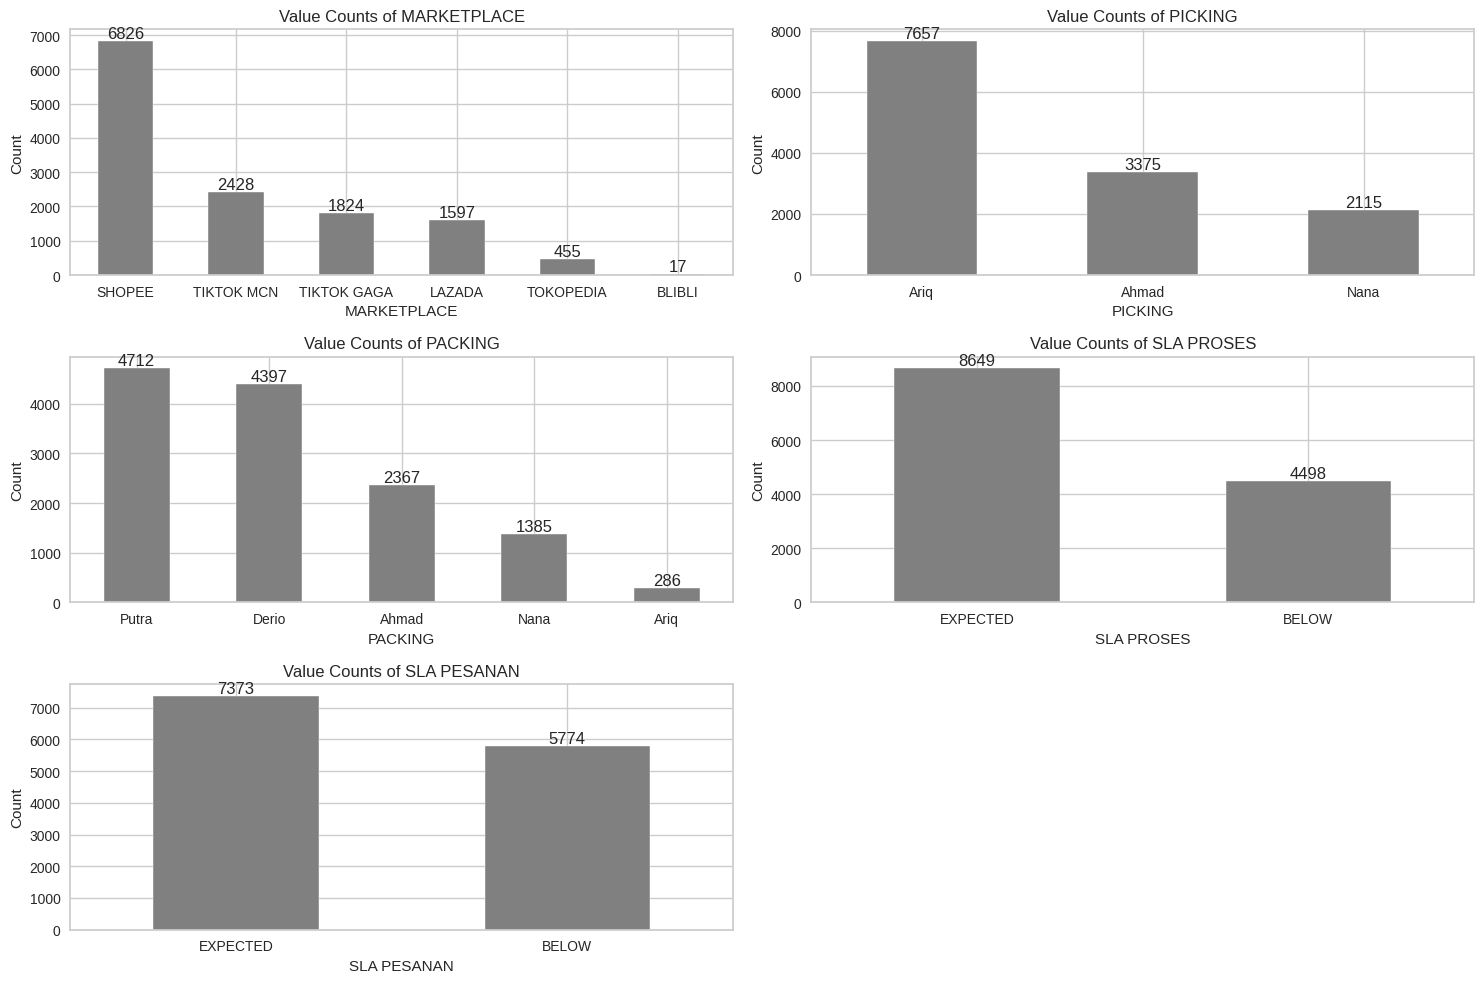

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# object columns
object_columns = df_checkout.select_dtypes(include=['object']).columns

# rows and columns for subplots
num_columns = len(object_columns)
num_rows = (num_columns + 1) // 2

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, 10))

# Plotting for each object column
for i, col in enumerate(object_columns):
    ax = axes[i // 2, i % 2]
    value_counts = df_checkout[col].value_counts()
    bars = value_counts.plot(kind='bar', ax=ax, color='grey')
    ax.set_title(f'Value Counts of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.set_xticklabels(value_counts.index, rotation=0)
    ax.yaxis.grid(True)  # horizontal gridline
    ax.set_axisbelow(True)  # horizontal gridline behind bars

    # Add value labels on top of bars
    for bar in bars.patches:
        x_pos = bar.get_x() + bar.get_width() / 2
        y_pos = bar.get_height()
        ax.annotate(f'{y_pos}', (x_pos, y_pos), ha='center', va='bottom')

# Remove any unused subplots
for i in range(num_columns, num_rows * 2):
    fig.delaxes(axes[i // 2, i % 2])

plt.tight_layout()
plt.show()


Berdasarkan analisis terhadap data yang diberikan dalam tabel-tabel sebelumnya, berikut adalah kesimpulan yang dapat diambil:

1. Marketplace Utilisasi:  
Marketplace Shopee adalah yang paling banyak digunakan, diikuti oleh TikTok MCN dan TikTok Gaga.
Lazada, Tokopedia, dan Blibli memiliki jumlah transaksi yang lebih rendah dibandingkan dengan tiga marketplace sebelumnya.

2. Pekerja Operasional (Picker dan Packer):  
Picker dengan jumlah tugas tertinggi adalah Ariq, sedangkan packer dengan jumlah tugas tertinggi adalah Putra.
Distribusi tugas antara picker dan packer tidak merata, dengan beberapa individu memiliki beban kerja yang jauh lebih tinggi dibandingkan yang lain.

3. Tingkat Kelayakan Waktu Pelayanan (SLA):  
Secara umum, sekitar 63% proses operasional memenuhi SLA waktu yang diharapkan ("EXPECTED").
Hanya sekitar 56% pesanan yang memenuhi SLA waktu yang diharapkan ("EXPECTED").
Dari kesimpulan di atas, kita dapat menyimpulkan bahwa bisnis e-commerce ini memiliki beberapa area yang dapat ditingkatkan dalam upaya untuk meningkatkan efisiensi operasional dan kepuasan pelanggan:

Pada sisi marketplace, ada potensi untuk memperluas penggunaan marketplace yang memiliki volume transaksi lebih rendah. Ini dapat membantu diversifikasi sumber pendapatan dan meningkatkan pangsa pasar di platform yang belum dimaksimalkan.

Distribusi beban kerja picker dan packer perlu diperhatikan untuk memastikan pekerjaan dibagi dengan adil dan efisien. Jika satu atau beberapa individu memiliki beban kerja yang terlalu berat, ini bisa mengganggu produktivitas dan akurasi.


Meskipun sebagian besar proses operasional memenuhi SLA waktu yang diharapkan, ada ruang untuk meningkatkan persentase ini. Peningkatan efisiensi dalam proses operasional, seperti packing dan pengiriman, bisa menghasilkan lebih banyak pesanan yang memenuhi SLA.

<ipython-input-439-69274831844e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_checkout['TANGGAL ORDER'] = pd.to_datetime(df_checkout['TANGGAL ORDER'])


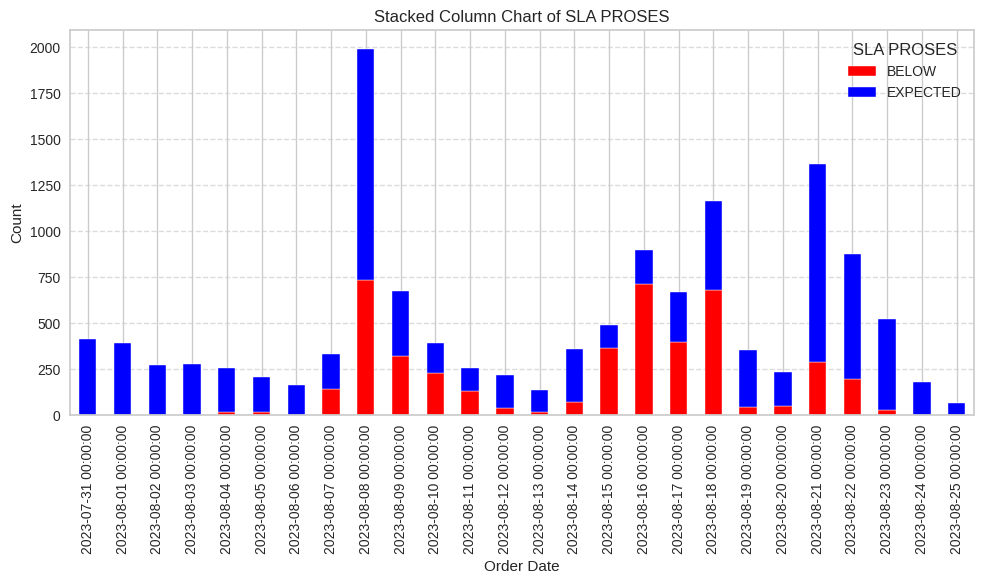

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'TANGGAL ORDER' to datetime if it's not already in datetime format
df_checkout['TANGGAL ORDER'] = pd.to_datetime(df_checkout['TANGGAL ORDER'])

# Count the occurrences of 'SLA PROSES'
sla_counts = df_checkout['SLA PROSES'].value_counts()

# Create a pivot table to structure the data for plotting
pivot_df = df_checkout.pivot_table(index='TANGGAL ORDER', columns='SLA PROSES', aggfunc='size', fill_value=0)

# Define colors for different 'SLA PROSES' values
colors = {'EXPECTED': 'blue', 'BELOW': 'red'}

# Plotting
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6), color=[colors[col] for col in pivot_df.columns])
ax.set_xlabel('Order Date')
ax.set_ylabel('Count')
ax.set_title('Stacked Column Chart of SLA PROSES')
plt.xticks(rotation=90)
plt.legend(title='SLA PROSES')

# Add grid lines
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


Dapat diamati bahwa terdapat hubungan yang menarik antara jumlah order dan persentase SLA Proses yang berada di bawah ekspektasi.

Pada awal periode, ketika jumlah order masih relatif rendah, persentase SLA Proses yang berada di bawah ekspektasi juga cenderung tetap rendah. Pada tanggal 31 Juli 2023 hingga 3 Agustus 2023, di mana jumlah order berkisar antara 260 hingga 414, persentase SLA Proses yang di bawah ekspektasi tetap berada di angka 1% atau bahkan 0%. Ini mungkin mengindikasikan bahwa kapasitas dan efisiensi dalam memproses order masih mampu mengatasi permintaan yang relatif stabil.

Namun, saat jumlah order mulai meningkat drastis pada tanggal 8 Agustus 2023, terlihat bahwa persentase SLA Proses yang berada di bawah ekspektasi juga meningkat secara signifikan. Pada tanggal ini, dengan jumlah order sebanyak 2000+, persentase SLA Proses yang di bawah ekspektasi sudah mencapai 30%. Hal ini menunjukkan bahwa kenaikan jumlah order dapat memberikan tekanan tambahan pada proses pemenuhan layanan yang kemudian mempengaruhi persentase SLA Proses yang tidak sesuai harapan.

Jumlah order yang signifikan pada tanggal tersebut membawa persentase SLA Proses yang berada di bawah ekspektasi melonjak drastis yang mengindikasikan adanya masalah serius dalam mengatasi permintaan yang tinggi.

Pada tanggal-tanggal lainnya dengan jumlah order yang tinggi, pola serupa terlihat di mana persentase SLA Proses yang berada di bawah ekspektasi tetap tinggi. Ini menggambarkan bahwa semakin besar jumlah order, semakin signifikan pula dampak terhadap ketidaksesuaian dalam mencapai SLA Proses yang diharapkan.

Data menunjukkan adanya hubungan antara jumlah order dan persentase SLA Proses yang berada di bawah ekspektasi. Semakin besar jumlah order, semakin besar pula potensi permasalahan dalam pemenuhan layanan yang mengarah pada ketidaksesuaian dengan target SLA Proses yang ditetapkan.

# **3. Outliers**

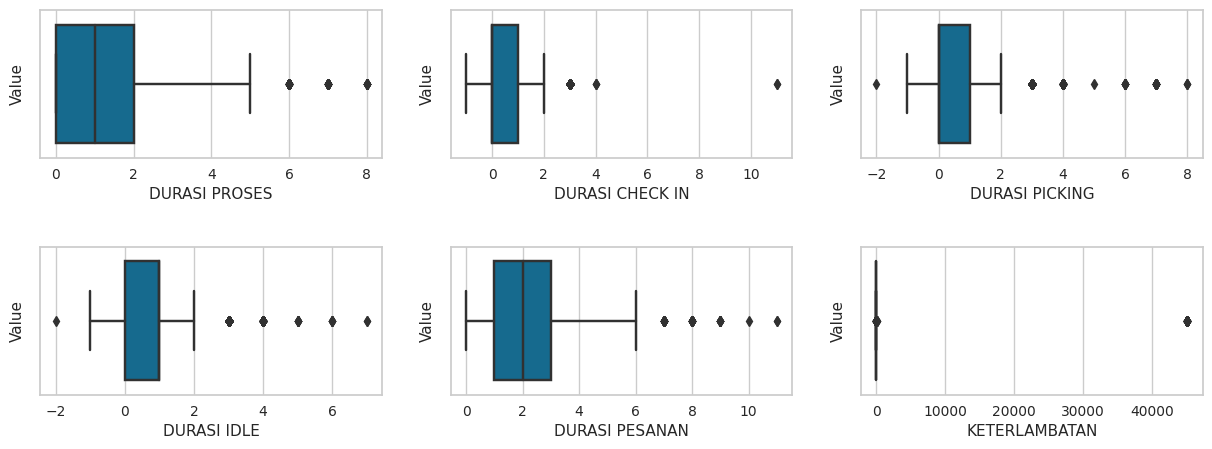

In [ ]:
# check outliers

# numerical columns list
numlist = df_checkout.select_dtypes(include=['int64']).columns.tolist()

# Boxplot outlier
sns.set_style("whitegrid")

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5), gridspec_kw={'hspace': 0.6})
axes = axes.flatten()

for i, column in enumerate(df_checkout[numlist].columns):
    # Create a boxplot of the column
    sns.boxplot(x=df_checkout[numlist][column], ax=axes[i])
    # Add a title to the plot
    axes[i].set_ylabel("Value")

Outliers adalah nilai-nilai yang berbeda secara signifikan dari mayoritas data dalam suatu kumpulan data. Dalam istilah yang lebih sederhana, outliers dapat dianggap sebagai "pencilan" atau "anomali" yang muncul di antara data-data yang umum.

Bayangkan kamu sedang mengumpulkan data tentang berapa banyak teman yang dimiliki oleh setiap orang di sekolahmu. Mayoritas orang mungkin memiliki sekitar 5-10 teman, tetapi ada satu orang yang memiliki 50 teman. Orang dengan jumlah teman yang sangat besar ini bisa dianggap sebagai outlier karena ia memiliki jumlah teman yang sangat berbeda dari kebanyakan orang di sekolah.

Outliers dapat muncul dalam berbagai jenis data dan bisa disebabkan oleh berbagai faktor, seperti kesalahan pengukuran, peristiwa luar biasa, atau variasi yang ekstrem dalam karakteristik tertentu. Dalam analisis data, mengenali dan memahami outliers penting karena mereka dapat mempengaruhi interpretasi keseluruhan data. Terkadang, outliers perlu diperhatikan dan dianalisis lebih mendalam untuk memastikan bahwa mereka tidak mengganggu hasil analisis atau kesimpulan yang diambil dari data.  

Dalam boxplot diatas, titik-titik hitam yang terlihat di luar garis "whisker" (garis vertikal yang memanjang keluar dari kotak) mewakili apa yang disebut sebagai "outliers". Outliers adalah nilai-nilai yang jauh berbeda dari mayoritas data dalam kumpulan data, dan mereka dapat memberikan informasi penting tentang variabilitas dan karakteristik data yang sedang diamati.

Ketika terlihat titik-titik hitam pada outlier dalam boxplot, ini menunjukkan bahwa terdapat nilai-nilai yang berada di luar jangkauan nilai yang umum atau di luar batasan normal dari data tersebut. Titik-titik hitam ini mungkin mencerminkan situasi atau kondisi yang ekstrem atau tidak biasa dalam kumpulan data.

In [ ]:
# interquartile range
iqr = df_checkout.quantile(0.75) - df_checkout.quantile(0.25)

# outliers into index array
outl_index = df_checkout[numlist][((df_checkout[numlist] < (df_checkout.quantile(0.25) - 1.5 * iqr)) |(df_checkout[numlist] > (df_checkout.quantile(0.75) + 1.5 * iqr))).any(axis=1)].index.tolist()

<ipython-input-441-05251ee3d7bd>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iqr = df_checkout.quantile(0.75) - df_checkout.quantile(0.25)
<ipython-input-441-05251ee3d7bd>:5: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  outl_index = df_checkout[numlist][((df_checkout[numlist] < (df_checkout.quantile(0.25) - 1.5 * iqr)) |(df_checkout[numlist] > (df_checkout.quantile(0.75) + 1.5 * iqr))).any(axis=1)].index.tolist()
<ipython-input-441-05251ee3d7bd>:5: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of nume

In [ ]:
# persentase outliers
print('Outlier percentage :', round(len(outl_index) / len(df) * 100, 1), '%')

Outlier percentage : 9.1 %


In [ ]:
# hapus outliers dari dataframe
df_clean = df_checkout.drop(index=outl_index, axis=1)

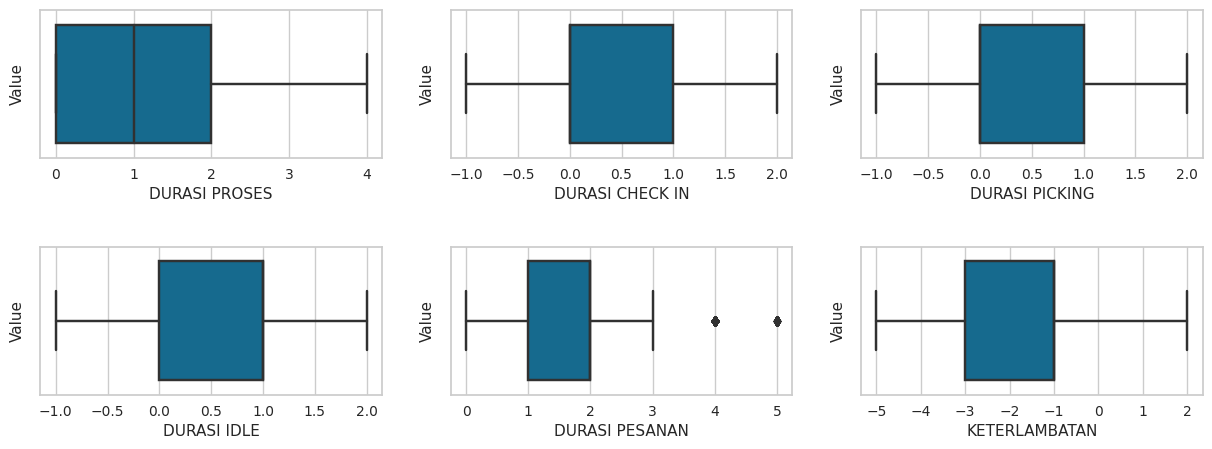

In [ ]:
# dataset setelah hapus outliers
sns.set_style("whitegrid")

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5), gridspec_kw={'hspace': 0.6})
axes = axes.flatten()

for i, column in enumerate(df_clean[numlist].columns):
    # Create a boxplot of the column
    sns.boxplot(x=df_clean[numlist][column], ax=axes[i])
    # Add a title to the plot
    axes[i].set_ylabel("Value")


Titik-titik hitam pada boxplot mengindikasikan adanya outliers, yaitu nilai-nilai ekstrem atau tidak biasa yang berada jauh dari mayoritas data dalam suatu dataset. Outliers dapat mempengaruhi analisis statistik dan interpretasi kita terhadap data. Ketika outliers dibersihkan dari dataset, titik-titik hitam ini akan menghilang, dan boxplot akan menunjukkan gambaran yang lebih representatif dari distribusi data.

Dengan data baru ini, kita dapat menghindari terjadinya bias atau tidak menggambarkan mayoritas data

# **4. Feature Standarization**

In [ ]:
df2 = df_clean[[
    'MARKETPLACE',
    'PICKING',
    'PACKING',
    'SLA PROSES',
    'SLA PESANAN',
    'DURASI PROSES',
    'DURASI CHECK IN',
    'DURASI PICKING',
    'DURASI IDLE',
    'DURASI PESANAN',
    'KETERLAMBATAN']]

In [ ]:
df2

,MARKETPLACE,PICKING,PACKING,SLA PROSES,SLA PESANAN,DURASI PROSES,DURASI CHECK IN,DURASI PICKING,DURASI IDLE,DURASI PESANAN,KETERLAMBATAN
0,TOKOPEDIA,Ariq,Ahmad,EXPECTED,EXPECTED,0,0,0,0,0,-3
1,TOKOPEDIA,Ariq,Ahmad,EXPECTED,EXPECTED,0,0,0,0,0,-3
2,TOKOPEDIA,Ariq,Ahmad,EXPECTED,EXPECTED,0,0,0,0,0,-3
3,SHOPEE,Ariq,Ahmad,EXPECTED,EXPECTED,0,0,0,0,0,-3
4,TOKOPEDIA,Ariq,Ahmad,EXPECTED,EXPECTED,0,0,0,0,0,-3
...,...,...,...,...,...,...,...,...,...,...,...
16243,SHOPEE,Ahmad,Derio,EXPECTED,EXPECTED,0,0,0,0,0,-3
16244,SHOPEE,Ahmad,Derio,EXPECTED,EXPECTED,0,0,0,0,0,-3
16245,SHOPEE,Ahmad,Derio,EXPECTED,EXPECTED,0,0,0,0,0,-3
16246,SHOPEE,Ahmad,Derio,EXPECTED,EXPECTED,0,0,0,0,0,-3


In [ ]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

# Select numerical and categorical columns
numlist = df2.select_dtypes(include=['int64']).columns.tolist()
catlist = df2.select_dtypes(include=['object']).columns.tolist()

# Scale numerical columns
scaler = StandardScaler()
scaled_numerical = pd.DataFrame(scaler.fit_transform(df2[numlist]), columns=numlist)

# Encode categorical columns with ordinal encoder
encoder = OrdinalEncoder()
encoded_categorical = pd.DataFrame(encoder.fit_transform(df2[catlist]), columns=catlist)

# Concatenate the scaled numerical and encoded categorical columns
df3 = pd.concat([scaled_numerical, encoded_categorical], axis=1)

In [ ]:
df3

,DURASI PROSES,DURASI CHECK IN,DURASI PICKING,DURASI IDLE,DURASI PESANAN,KETERLAMBATAN,MARKETPLACE,PICKING,PACKING,SLA PROSES,SLA PESANAN
0,-1.254418,-0.851953,-0.639856,-0.902547,-1.451296,-1.112602,5.0,1.0,0.0,1.0,1.0
1,-1.254418,-0.851953,-0.639856,-0.902547,-1.451296,-1.112602,5.0,1.0,0.0,1.0,1.0
2,-1.254418,-0.851953,-0.639856,-0.902547,-1.451296,-1.112602,5.0,1.0,0.0,1.0,1.0
3,-1.254418,-0.851953,-0.639856,-0.902547,-1.451296,-1.112602,2.0,1.0,0.0,1.0,1.0
4,-1.254418,-0.851953,-0.639856,-0.902547,-1.451296,-1.112602,5.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
11651,-1.254418,-0.851953,-0.639856,-0.902547,-1.451296,-1.112602,2.0,0.0,2.0,1.0,1.0
11652,-1.254418,-0.851953,-0.639856,-0.902547,-1.451296,-1.112602,2.0,0.0,2.0,1.0,1.0
11653,-1.254418,-0.851953,-0.639856,-0.902547,-1.451296,-1.112602,2.0,0.0,2.0,1.0,1.0
11654,-1.254418,-0.851953,-0.639856,-0.902547,-1.451296,-1.112602,2.0,0.0,2.0,1.0,1.0


# **ALGORITMA K-MEANS CLUSTERING**

## PROSES PEMBUATAN ALGORITMA CLUSTER

K-Means Clustering adalah metode dalam analisis data yang digunakan untuk mengelompokkan data ke dalam kelompok-kelompok yang mirip. Prosesnya melibatkan pemilihan jumlah kelompok yang diinginkan, pemilihan titik awal sebagai pusat setiap kelompok, pengelompokan titik data ke kelompok terdekat, perhitungan pusat baru untuk setiap kelompok, dan iterasi hingga pusat kelompok stabil. Tujuannya adalah mengurangi jarak antara titik-titik data dan pusat kelompoknya, menghasilkan kelompok-kelompok yang mewakili pola-pola dalam data.

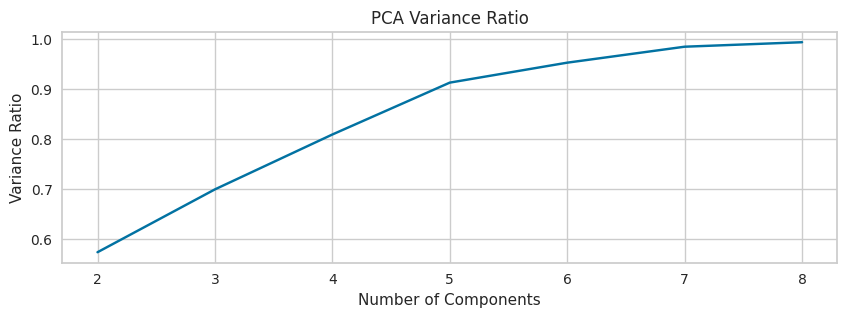

In [ ]:
from sklearn.decomposition import PCA

var_ratio = {}
c = range(2, 9)
for n in c:
    pc = PCA(n_components=n)
    cr_pca = pc.fit(df3)
    var_ratio[n] = sum(cr_pca.explained_variance_ratio_).round(3)

pd.Series(var_ratio).plot(figsize=(10, 3), grid=True)
plt.xlabel('Number of Components')
plt.ylabel('Variance Ratio')
plt.title('PCA Variance Ratio')
plt.show()

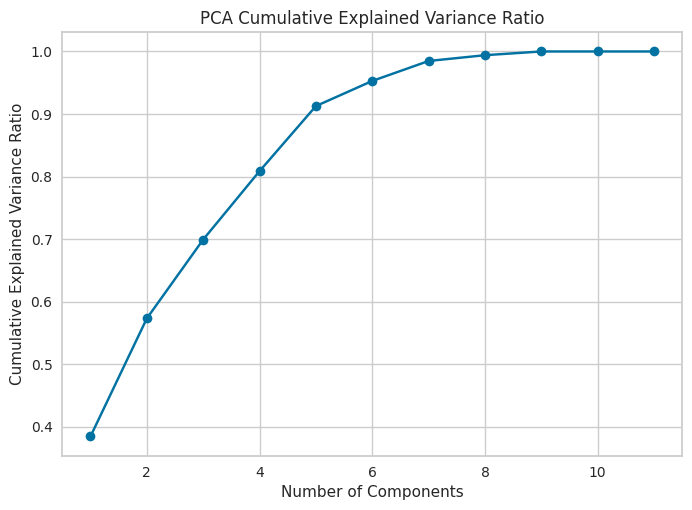

Best number of components: 4


In [ ]:
import numpy as np

# find the best n_components

# Perform PCA
pca = PCA()
pca.fit(df3)

# Calculate cumulative explained variance ratio
cumulative_var_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance ratio
plt.plot(range(1, len(cumulative_var_ratio) + 1), cumulative_var_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

# Find the number of components that retain a significant amount of variance
threshold = 0.8
best_n_components = np.argmax(cumulative_var_ratio >= threshold) + 1
print(f"Best number of components: {best_n_components}")

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

n_components = 3
XX = PCA(n_components=n_components).fit_transform(df3)

# Generate range of cluster numbers
c = range(2, 10)

silhouette_scores = {}

# Iterate over each cluster number
for num_clusters in c:
    # Apply K-means clustering
    kmeans = KMeans(n_clusters=num_clusters, random_state=np.random.randint(1, 1000), n_init=num_clusters)
    kmeans_result = kmeans.fit_predict(df3)

    # Calculate the silhouette score
    silhouette_avg = silhouette_score(XX, kmeans_result)

    # Store the silhouette score in the dictionary
    silhouette_scores[num_clusters] = silhouette_avg

# Print the silhouette scores for each cluster number
for num_clusters, silhouette_avg in silhouette_scores.items():
    print(f"Number of Clusters: {num_clusters}, Silhouette Score: {silhouette_avg}")


Number of Clusters: 2, Silhouette Score: 0.3354768750206597
Number of Clusters: 3, Silhouette Score: 0.29998675504830025
Number of Clusters: 4, Silhouette Score: 0.2957584792091223
Number of Clusters: 5, Silhouette Score: 0.2687057267938408
Number of Clusters: 6, Silhouette Score: 0.2824782953155653
Number of Clusters: 7, Silhouette Score: 0.24289307596354928
Number of Clusters: 8, Silhouette Score: 0.2815071794808206
Number of Clusters: 9, Silhouette Score: 0.2608518543778157


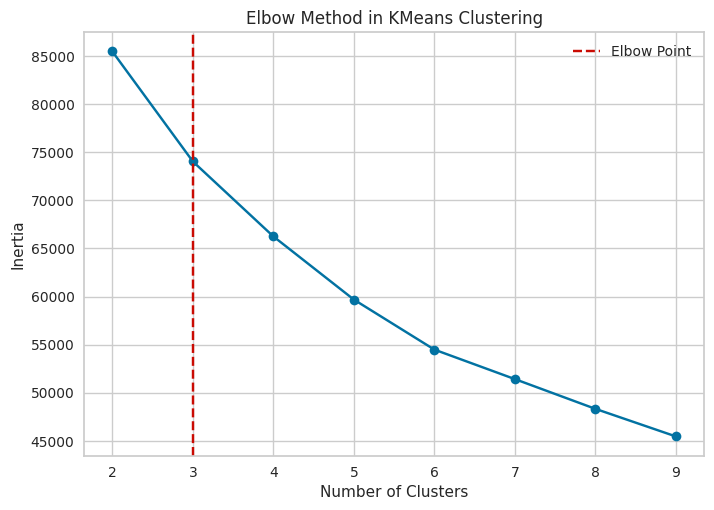

Silhouette Score: 0.29287967197838727
Optimal number of clusters: 3


In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

n_components = 3
XX = PCA(n_components = n_components).fit_transform(df3)

# Generate range of cluster numbers
c = range(2, 10)

# Compute inertia for each cluster number
inertia = []
for i in c:
    kmeans = KMeans(n_clusters=i, random_state=np.random.randint(1, 1000), n_init=i)
    kmeans.fit(df3)
    inertia.append(kmeans.inertia_)

# Find the elbow point (optimal number of clusters)
elbow_point = c[np.argmax(inertia) + 1]

# Plot the inertia values
plt.plot(c, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method in KMeans Clustering')
plt.axvline(x=elbow_point, color='r', linestyle='--', label='Elbow Point')
plt.legend()
plt.show()

# Apply K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=elbow_point, random_state=np.random.randint(1, 1000), n_init=elbow_point)
kmeans_result = kmeans.fit_predict(XX)

# Calculate the silhouette score for the optimal number of clusters
silhouette_avg = silhouette_score(XX, kmeans_result)

# Print the silhouette score
print("Silhouette Score:", silhouette_avg)
print("Optimal number of clusters:", elbow_point)

Angka optimal untuk jumlah klaster adalah jumlah klaster yang memaksimalkan nilai Silhouette Score. Ini adalah jumlah klaster yang memberikan pengelompokan yang paling baik berdasarkan data yang tersedia. Algoritma K-Means mencoba berbagai kombinasi jumlah klaster dan menghitung Silhouette Score untuk masing-masing kombinasi tersebut. Nilai tertinggi dari Silhouette Score menunjukkan jumlah klaster yang paling cocok untuk data.

Dalam rangkaian Anda, Silhouette Score 0.3136704798429068 menunjukkan bahwa pengelompokan data memiliki sejumlah kelompok yang dapat dianggap baik, tetapi mungkin masih ada beberapa tumpang tindih antara klaster. Algoritma K-Means merekomendasikan 3 klaster sebagai jumlah optimal berdasarkan hasil evaluasi nilai Silhouette Score.

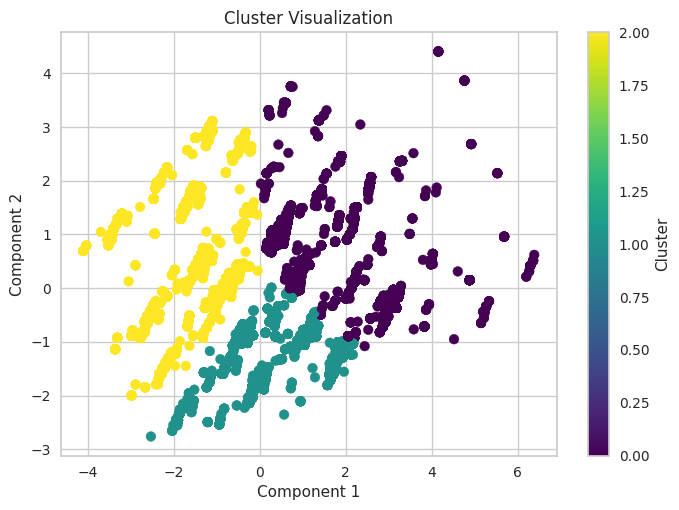

In [ ]:
# Visualize the scatter plot of the clusters
plt.scatter(XX[:, 0], XX[:, 1], c=kmeans_result, cmap='viridis')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Cluster Visualization')
plt.colorbar(label='Cluster')
plt.show()

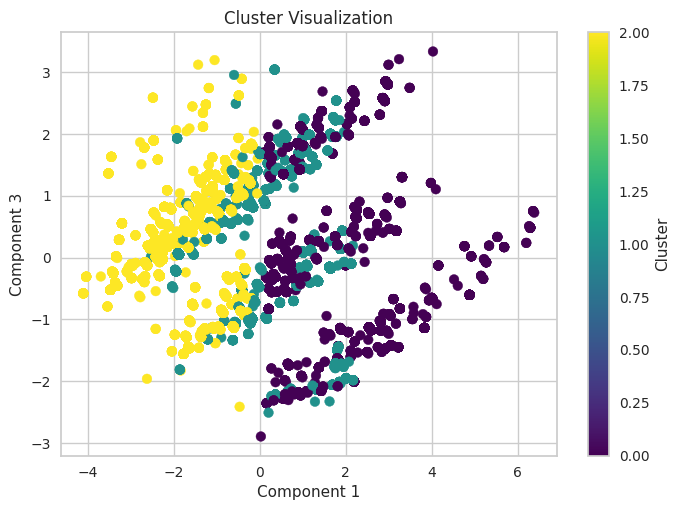

In [ ]:
# Visualize the scatter plot of the clusters
plt.scatter(XX[:, 0], XX[:, 2], c=kmeans_result, cmap='viridis')
plt.xlabel('Component 1')
plt.ylabel('Component 3')
plt.title('Cluster Visualization')
plt.colorbar(label='Cluster')
plt.show()

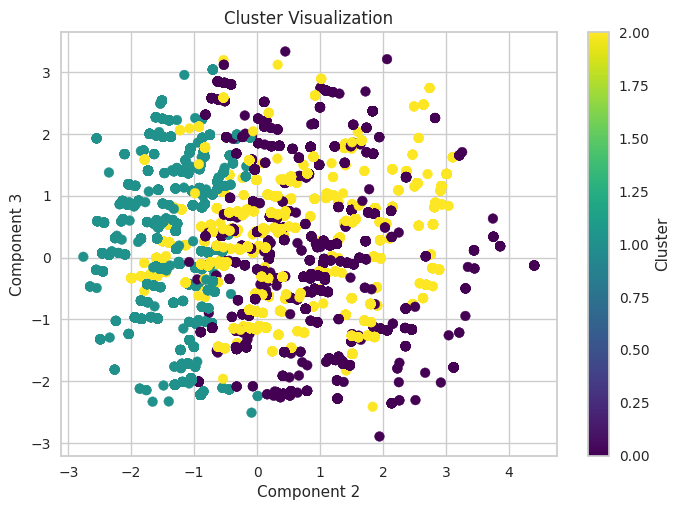

In [ ]:
# Visualize the scatter plot of the clusters
plt.scatter(XX[:, 1], XX[:, 2], c=kmeans_result, cmap='viridis')
plt.xlabel('Component 2')
plt.ylabel('Component 3')
plt.title('Cluster Visualization')
plt.colorbar(label='Cluster')
plt.show()

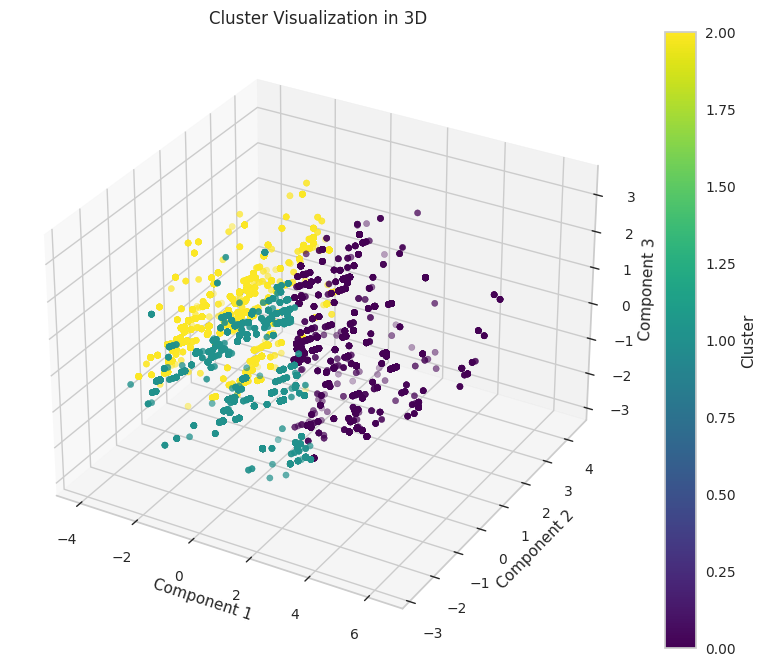

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Visualize the scatter plot of the clusters in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(XX[:, 0], XX[:, 1], XX[:, 2], c=kmeans_result, cmap='viridis')

ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.set_title('Cluster Visualization in 3D')
fig.colorbar(scatter, ax=ax, label='Cluster')

plt.show()


## MENERAPKAN ALGORITMA K-MEANS KE DATASET ASLI

In [ ]:
def analyze_clustering(dataset):
    # Preprocess the dataset
    # Select numerical and categorical columns
    numlist = df2.select_dtypes(include=['int64']).columns.tolist()
    catlist = df2.select_dtypes(include=['object']).columns.tolist()

    # Scale numerical columns
    scaler = StandardScaler()
    scaled_numerical = pd.DataFrame(scaler.fit_transform(dataset[numlist]), columns=numlist)

    # Encode categorical columns with ordinal encoder
    encoder = OrdinalEncoder()
    encoded_categorical = pd.DataFrame(encoder.fit_transform(dataset[catlist]), columns=catlist)

    # Concatenate the scaled numerical and encoded categorical columns
    scaled_dataset = pd.concat([scaled_numerical, encoded_categorical], axis=1)

    # Perform PCA
    pca = PCA()
    pca.fit(scaled_dataset)

    # Calculate cumulative explained variance ratio
    cumulative_var_ratio = np.cumsum(pca.explained_variance_ratio_)

    # Find the number of components that retain a significant amount of variance
    threshold = 0.8
    best_n_components = np.argmax(cumulative_var_ratio >= threshold) + 1

    # Apply PCA with the best number of components
    pca = PCA(n_components = best_n_components)
    XX = pca.fit_transform(scaled_dataset)

   # Generate range of cluster numbers
    c = range(2, 18)

    # Compute inertia for each cluster number
    inertia = []
    for i in c:
        kmeans = KMeans(n_clusters=i, random_state=np.random.randint(1, 1000), n_init=i)
        kmeans.fit(XX)
        inertia.append(kmeans.inertia_)

    # Find the elbow point (optimal number of clusters)
    elbow_point = c[np.argmax(max(inertia)) + 1]

    # Apply K-means clustering with the optimal number of clusters
    kmeans = KMeans(n_clusters=elbow_point, random_state=np.random.randint(1, 1000), n_init=elbow_point)
    kmeans_result = kmeans.fit_predict(XX)

    return kmeans_result

In [ ]:
pd.DataFrame(analyze_clustering(df_co)).value_counts()

2    4883
1    4613
0    3651
dtype: int64

In [ ]:
# concatenate to original dataset
cluster_df = pd.DataFrame(
    np.concatenate([pd.DataFrame(analyze_clustering(df_co)), df_co], axis=1),
    columns=['cluster'] + df_co.columns.tolist(),)

In [ ]:
cluster_df

,cluster,PRIMARY KEY,SCAN RESI,MARKETPLACE,TGL CHECK IN,TGL CHECK OUT,TGL PICKING,TANGGAL ORDER,BATAS KIRIM,PICKING,PACKING,SLA PROSES,SLA PESANAN,DURASI PROSES,DURASI CHECK IN,DURASI PICKING,DURASI IDLE,DURASI PESANAN,KETERLAMBATAN
0,2,CI-00001,TLJR35U9UKM7F1MQ,TOKOPEDIA,2023-07-31,2023-07-31,2023-07-31,2023-07-31,2023-08-03,Ariq,Ahmad,EXPECTED,EXPECTED,0,0,0,0,0,-3
1,2,CI-00002,TLJR3DJPLCM7F1MQ,TOKOPEDIA,2023-07-31,2023-07-31,2023-07-31,2023-07-31,2023-08-03,Ariq,Ahmad,EXPECTED,EXPECTED,0,0,0,0,0,-3
2,2,CI-00003,TLJC3DE0W5M7F1MQ,TOKOPEDIA,2023-07-31,2023-07-31,2023-07-31,2023-07-31,2023-08-03,Ariq,Ahmad,EXPECTED,EXPECTED,0,0,0,0,0,-3
3,2,CI-00004,CM47662426618,SHOPEE,2023-07-31,2023-07-31,2023-07-31,2023-07-31,2023-08-03,Ariq,Ahmad,EXPECTED,EXPECTED,0,0,0,0,0,-3
4,2,CI-00005,TLJR3DL6N1M7F1MQ,TOKOPEDIA,2023-07-31,2023-07-31,2023-07-31,2023-07-31,2023-08-03,Ariq,Ahmad,EXPECTED,EXPECTED,0,0,0,0,0,-3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13142,2,CI-16244,230825JNNEXXC1,SHOPEE,2023-08-25,2023-08-25,2023-08-25,2023-08-25,2023-08-28,Ahmad,Derio,EXPECTED,EXPECTED,0,0,0,0,0,-3
13143,2,CI-16245,230825JJK2WJ6E,SHOPEE,2023-08-25,2023-08-25,2023-08-25,2023-08-25,2023-08-28,Ahmad,Derio,EXPECTED,EXPECTED,0,0,0,0,0,-3
13144,2,CI-16246,230825JJF7WX85,SHOPEE,2023-08-25,2023-08-25,2023-08-25,2023-08-25,2023-08-28,Ahmad,Derio,EXPECTED,EXPECTED,0,0,0,0,0,-3
13145,2,CI-16247,230825JHXA5MVK,SHOPEE,2023-08-25,2023-08-25,2023-08-25,2023-08-25,2023-08-28,Ahmad,Derio,EXPECTED,EXPECTED,0,0,0,0,0,-3


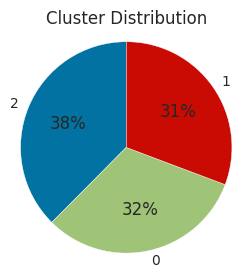

In [ ]:
# Calculate value counts
cluster_counts = pd.Series(kmeans_result).value_counts()

# Create a pie chart
plt.figure(figsize=(3, 3))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.0f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Cluster Distribution')
plt.show()

In [ ]:
cluster_df.cluster = cluster_df.cluster.replace({0 : 'A', 1 : 'B', 2 : 'C'})

In [ ]:
cluster_df.columns.tolist()

['cluster',
 'PRIMARY KEY',
 'SCAN RESI',
 'MARKETPLACE',
 'TGL CHECK IN',
 'TGL CHECK OUT',
 'TGL PICKING',
 'TANGGAL ORDER',
 'BATAS KIRIM',
 'PICKING',
 'PACKING',
 'SLA PROSES',
 'SLA PESANAN',
 'DURASI PROSES',
 'DURASI CHECK IN',
 'DURASI PICKING',
 'DURASI IDLE',
 'DURASI PESANAN',
 'KETERLAMBATAN']

In [ ]:
cluster_df = cluster_df[[
    'cluster',
    'MARKETPLACE',
    'TGL CHECK IN',
    'TGL CHECK OUT',
    'TGL PICKING',
    'TANGGAL ORDER',
    'BATAS KIRIM',
    'PICKING',
    'PACKING',
    'SLA PROSES',
    'SLA PESANAN',
    'DURASI PROSES',
    'DURASI CHECK IN',
    'DURASI PICKING',
    'DURASI IDLE',
    'DURASI PESANAN',
    'KETERLAMBATAN'
]]

In [ ]:
# Define the desired data types as a dictionary
data_types = {
  'cluster' : str,
  'MARKETPLACE' : str,
  'PICKING' : str,
  'PACKING' : str,
  'SLA PROSES' : str,
  'SLA PESANAN' : str,
  'DURASI PROSES' : int,
  'DURASI CHECK IN' : int,
  'DURASI PICKING' : int,
  'DURASI IDLE' : int,
  'DURASI PESANAN' : int,
  'KETERLAMBATAN' : int
}

# Change the data types of the specified columns in cluster_df
cluster_df = cluster_df.astype(data_types)

In [ ]:
cluster_df.dtypes

cluster                    object
MARKETPLACE                object
TGL CHECK IN       datetime64[ns]
TGL CHECK OUT      datetime64[ns]
TGL PICKING        datetime64[ns]
TANGGAL ORDER      datetime64[ns]
BATAS KIRIM        datetime64[ns]
PICKING                    object
PACKING                    object
SLA PROSES                 object
SLA PESANAN                object
DURASI PROSES               int64
DURASI CHECK IN             int64
DURASI PICKING              int64
DURASI IDLE                 int64
DURASI PESANAN              int64
KETERLAMBATAN               int64
dtype: object

## ANALISA PERFORMA TIM BERDASARKAN CLUSTER

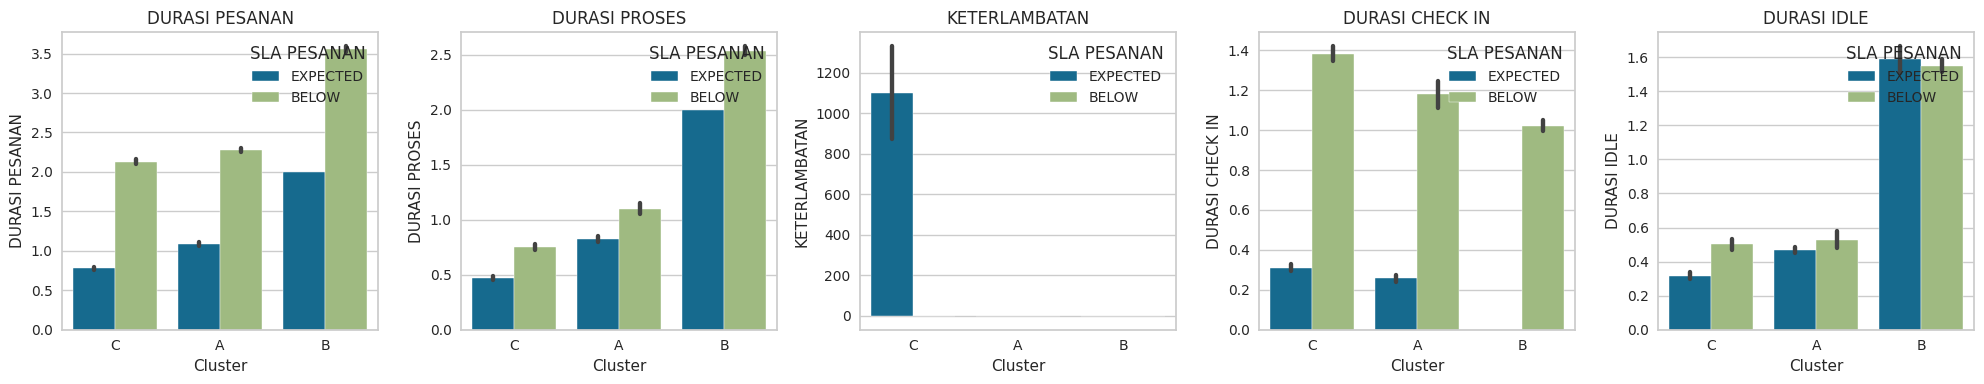

In [ ]:
# Create a figure and axes for the subplots
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 4))
axes = axes.flatten()

# List of columns to plot
columns_to_plot = ['DURASI PESANAN', 'DURASI PROSES', 'KETERLAMBATAN', 'DURASI CHECK IN', 'DURASI IDLE']

# Loop through columns and create bar plots
for i, column in enumerate(columns_to_plot):
    ax = axes[i]
    sns.barplot(data=cluster_df, hue='SLA PESANAN', y=column, x='cluster', ax=ax)
    ax.set_title(column)
    ax.legend(title='SLA PESANAN', loc='upper right')
    ax.set_xlabel('Cluster')
    ax.set_ylabel(column)

# Adjust layout
plt.tight_layout()
plt.show()

Dalam hasil analisis klasterisasi, data telah terbagi menjadi tiga kelompok utama, yaitu Cluster A, Cluster B, dan Cluster C, berdasarkan tingkat durasi pesanan mereka. Cluster A dan Cluster C menunjukkan performa yang baik, karena memiliki tingkat durasi pesanan di bawah 1 hari yang sesuai dengan target SLA yang ditetapkan. Pesanan-pesanan dalam kelompok-kelompok ini dapat diproses dengan sangat efisien, dan pelanggan dapat menerima produk atau layanan dalam waktu singkat, memenuhi harapan mereka. Namun, Cluster B menunjukkan tingkat durasi pesanan yang berada di kisaran 2 hari hingga lebih dari 2 hari, yang di bawah target SLA yang telah ditetapkan. Kelompok ini mungkin memerlukan perhatian lebih dalam hal proses dan pengiriman pesanan mereka untuk memastikan kepatuhan terhadap SLA yang telah ditetapkan dan meningkatkan kepuasan pelanggan.

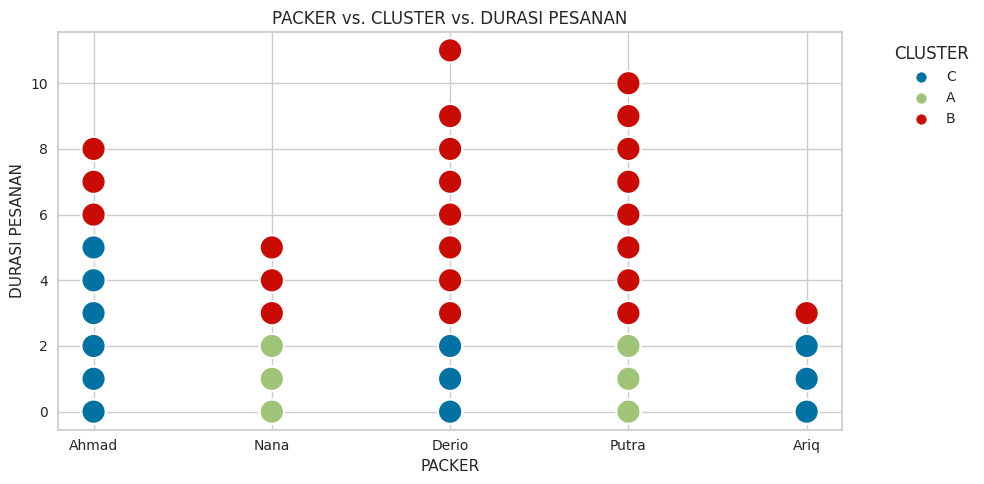

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a custom color palette with 5 colors
custom_palette = sns.color_palette("deep", n_colors=6)

plt.figure(figsize=(10, 5))
sns.scatterplot(data=cluster_df, hue='cluster', y='DURASI PESANAN', x='PACKING', s=300)

plt.xlabel('PACKER')
plt.ylabel('DURASI PESANAN')
plt.title('PACKER vs. CLUSTER vs. DURASI PESANAN')

plt.legend(title='CLUSTER', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


berdasarkan plot di atas, sebagai packer Ahmad memiliki cluster C paling banyak diantara packer lainnya yang mana artinya Ahmad memiliki performa paling baik karena rata-rata resi yang dikerjakan Ahmad sebagai packer memiliki SLA pesanan yang baik. Derio berada dalam cluster C dan cluster B namun lebih banyak di cluster C. Nana dan Putra sama-sama berada dalam cluster A dan cluster B, yang mana artinya tingkat SLA pesanan untuk resi yang mereka kerjakan lebih sering 2 hingga 3 hari.  

Jika kita lihat pada grafik sebelumnya, Putra paling banyak menyelesaikan resi sebagai packer jika dibandingkan packer lainnya. Dapat dipastikan SLA pesanan untuk resi yang dikerjakan oleh Putra dipengaruhi oleh banyaknya pesanan yang masuk pada tanggal tertentu sehingga putra lebih banyak membutuhkan waktu dan tenaga untuk menyelesaikan resi yang dia terima.  

Nana tidak begitu berbeda dengan Putra, namun Nana memiliki cluster B lebih sedikit dibandingkan dengan Putra. Jika kita melihat pada grafik sebelumnya, Nana berada pada urutan ke-4 sebagai packer. Ini mengindikasikan bahwa kecepatan Nana sebagai seorang packer di bawah anggota lainnya.

Ariq memiliki jumlah cluster B paling sedikit. Jika kita melihat pada grafik sebelumnya, Ariq berada urutan terakhir yaitu ke-5 sebagai seorang packer. Bisa kita lihat bahwa jumlah resi yang dikerjakan Ariq sebagai packer berdampak pada SLA pesanan, yaitu Ariq cendurung dapat menyelesaikan resi sebagai packer dengan SLA pesanan yang cukup baik karena seluruh jumlah pesanan yang tidak begitu banyak dapat diselesaikannya dengan baik.

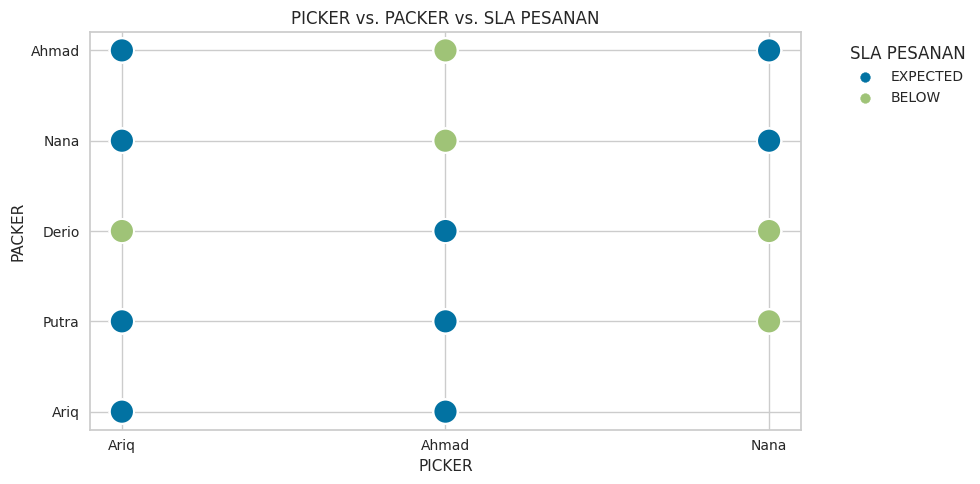

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=cluster_df, x='PICKING', hue='SLA PESANAN', y='PACKING', s=300)

plt.xlabel('PICKER')
plt.ylabel('PACKER')
plt.title('PICKER vs. PACKER vs. SLA PESANAN')

plt.legend(title='SLA PESANAN', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Grafik di atas adalah kombinasi tim untuk picker dan packer untuk sLA pesanan. Ariq memiliki tingkat sLA yang paling baik diantara picker lainnya. Jumlah SLA 'expected' terbanyak ketika Ariq memiliki kombinasi tim packer yaitu Putra, Nana, dan Ahmad.

Ahmad sebagai picker masih cukup baik jika dibandingkan dengan Ariq, namun kondisi terbaiknya yaitu pada 2 orang packer yaitu Putra dan Derio.

Nana sebagai picker berada urutan paling terakhir, kondisi terbaiknya yaitu jika Ahmad sebagai packer, dan Ariq tidak pernah sebagai seorang packer jika Nana sebagai picker

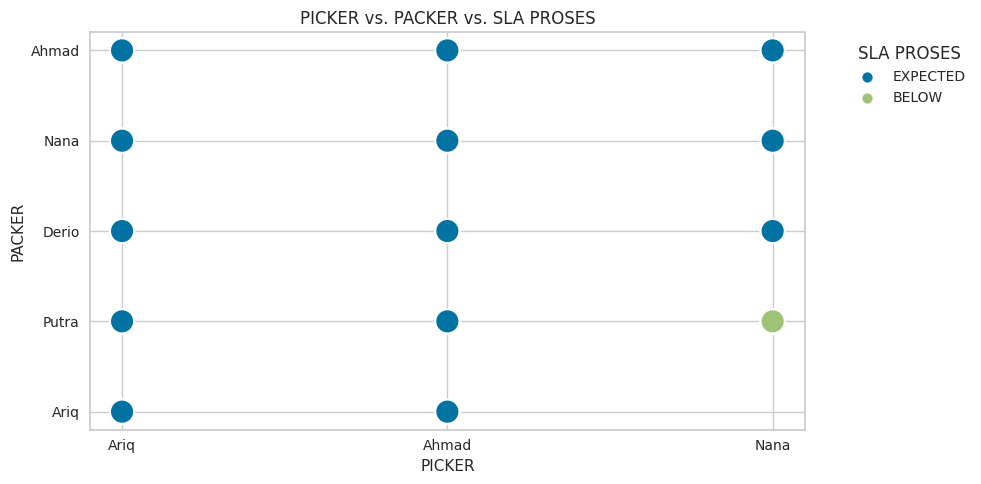

In [ ]:
plt.figure(figsize=(10,5))
colors = {'EXPECTED': 'blue', 'BELOW': 'red'}
sns.scatterplot(data=cluster_df, x='PICKING', hue='SLA PROSES', y='PACKING', s=300)

plt.xlabel('PICKER')
plt.ylabel('PACKER')
plt.title('PICKER vs. PACKER vs. SLA PROSES')

plt.legend(title='SLA PROSES', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Grafik di atas adalah kombinasi untuk tim picker dan packer untuk SLA proses.  
Ariq dan Ahmad sangat baik sebagai picker karena dapat memimpin seluruh packer dan menghasilkan SLA proses yang baik yaitu rata-rata 1 hari.  
Namun kali ini lagi, Nana berada dalam urutan terakhir sebagai picker. Kondisi terbaiknya yaitu hanya Derio dan Ahmad jika sebagai packer.  
jika kita bandingkan dengan grafik sebelumnya, dapat kita simpulkan Nana tidak lebih cepat sebagai picker jika dibandingkan dengan Ariq dan Ahmad sehingga mempengaruhi sLA proses maupun sLA pesanan.

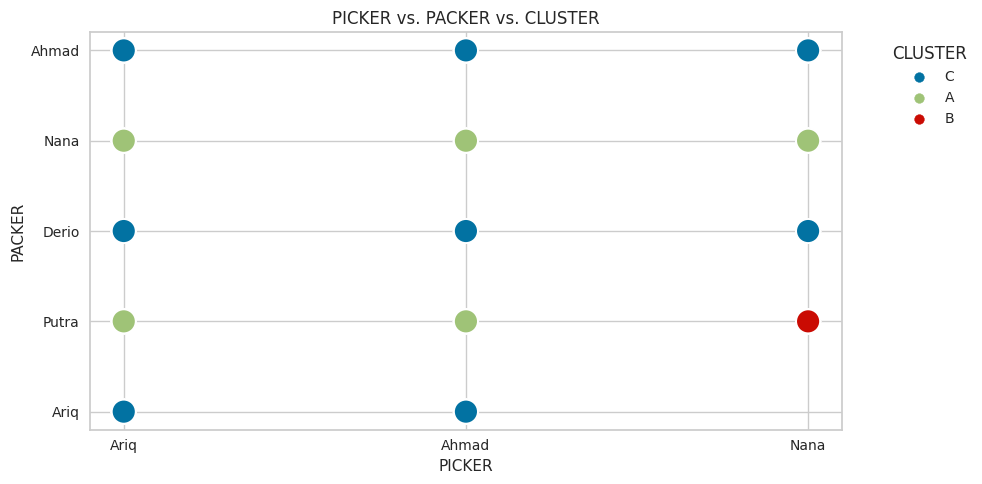

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=cluster_df, x='PICKING', hue='cluster', y='PACKING', s=300)

plt.xlabel('PICKER')
plt.ylabel('PACKER')
plt.title('PICKER vs. PACKER vs. CLUSTER')

plt.legend(title='CLUSTER', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Melanjutkan grafik sebelumnya, Nana masih berada di urutan terakhir sebagai picker, selain itu jika dipasangkan dengan Putra sebagai packer akan berada di cluster B.

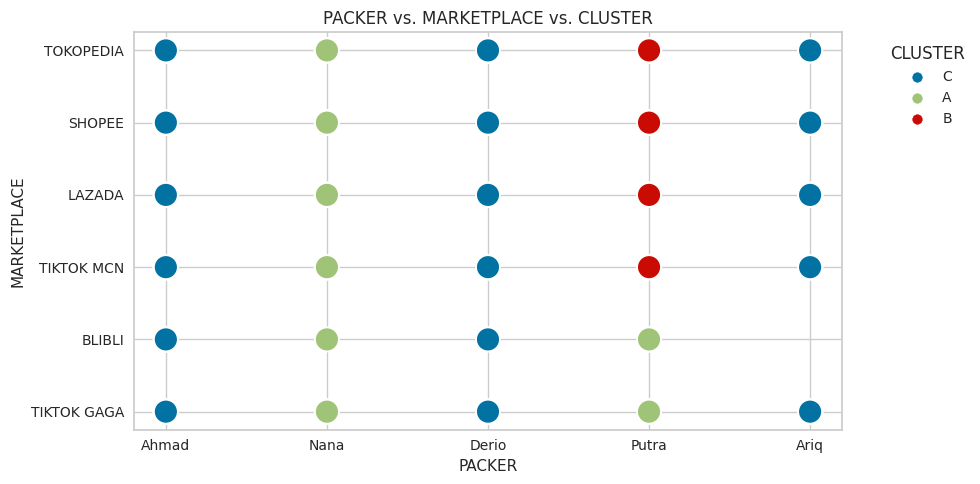

In [ ]:
plt.figure(figsize=(10,5))
colors = {'EXPECTED': 'blue', 'BELOW': 'red'}
sns.scatterplot(data=cluster_df, y='MARKETPLACE', hue='cluster', x='PACKING', s=300)

plt.xlabel('PACKER')
plt.ylabel('MARKETPLACE')
plt.title('PACKER vs. MARKETPLACE vs. CLUSTER')

plt.legend(title='CLUSTER', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Sebagai seorang packer, Ahmad, Derio, dan Ariq sangat baik walaupun Ariq berada di urutan terakhir sebagai packer. Resi dari seluruh marketplace dapat terselesaikan dengan SLA yang baik yaitu rata-rata 1 hari selesai. Nana tergolong cukup baik sebagai seorang packer, walaupun berada dalam cluster A yaitu dengan SLA 1 hingga 2 hari.

Namun kali ini, Putra dominan di cluster B jika disandingkan dengan seluruh resi dari marketplace. Kesimpulan sementara yaitu sebagai seorang packer yang paling banyak mengerjakan resi, Putra membutuhkan waktu dan tenaga yang lebih banyak dibandingkan packer lainnya. SLA pesanan yang di bawah rata-rata untuk resi yang dikerjakan oleh Putra dipengaruhi oleh banyaknya resi yang dia kerjakan.

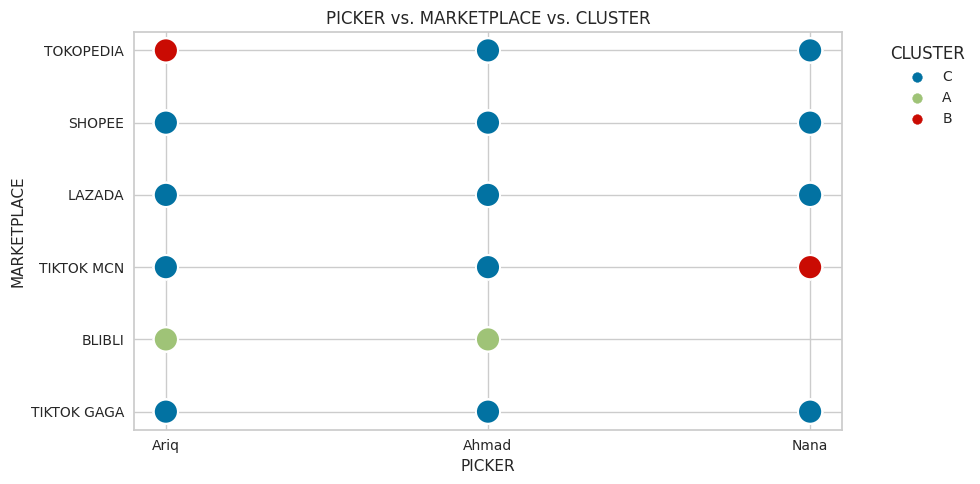

In [ ]:
plt.figure(figsize=(10,5))
colors = {'EXPECTED': 'blue', 'BELOW': 'red'}
sns.scatterplot(data=cluster_df, y='MARKETPLACE', hue='cluster', x='PICKING', s=300)

plt.xlabel('PICKER')
plt.ylabel('MARKETPLACE')
plt.title('PICKER vs. MARKETPLACE vs. CLUSTER')

plt.legend(title='CLUSTER', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Sebagai seorang picker, Ahmad yang terbaik diantara Ariq dan Nana karena tidak masuk dalam cluster B untuk semua resi dari marketplace. Ariq tidak cukup baik untuk mengerjakan resi dari Tokopedia, sementara Nana tidak cukup baik mengerjakan resi dari Tiktok MCN.

In [ ]:
# Convert 'TANGGAL ORDER' column to datetime
cluster_df['TANGGAL ORDER'] = pd.to_datetime(cluster_df['TANGGAL ORDER'])

# Group by 'TANGGAL ORDER' and calculate the mean of integer columns
mean_df = cluster_df.groupby('TANGGAL ORDER').mean()

# Group by 'TANGGAL ORDER', calculate the mode of the 'cluster' column,
# reset the index, and rename the 'cluster' column to 'mode_cluster'
mode_df = cluster_df.groupby('TANGGAL ORDER')['cluster'].apply(lambda x: x.mode().iloc[0]).reset_index()
mode_df.rename(columns={'cluster': 'mode_cluster'}, inplace=True)


<ipython-input-474-7e1905505290>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_df = cluster_df.groupby('TANGGAL ORDER').mean()


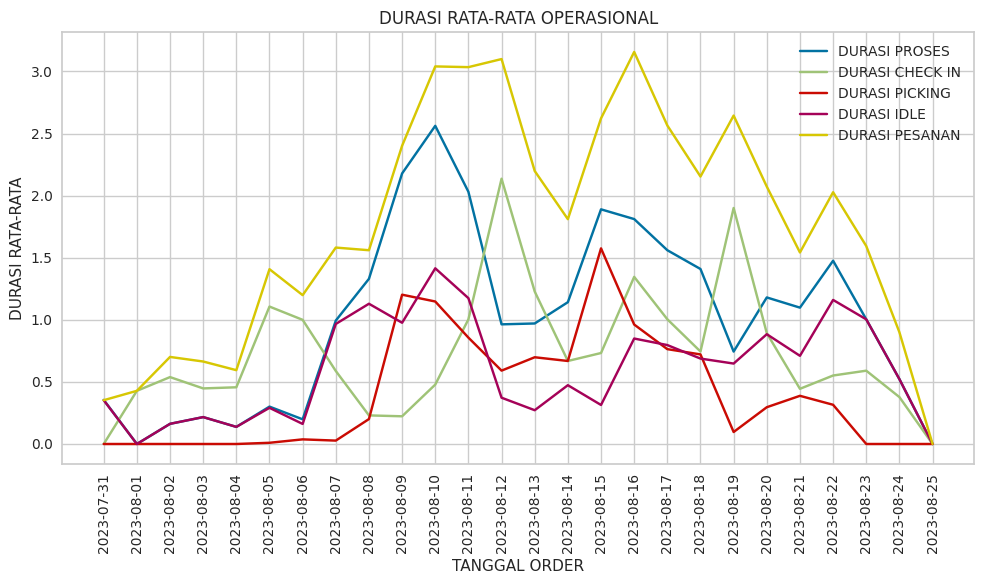

In [ ]:
# Define the columns
columns_to_plot = ['DURASI PROSES', 'DURASI CHECK IN', 'DURASI PICKING', 'DURASI IDLE', 'DURASI PESANAN']

# Set the figure size
plt.figure(figsize=(10, 6))

# Loop through each column and plot it
for column in columns_to_plot:
    plt.plot(mean_df.index, mean_df[column], label=column)

# Add labels and title
plt.xlabel('TANGGAL ORDER')
plt.ylabel('DURASI RATA-RATA')
plt.title('DURASI RATA-RATA OPERASIONAL')

# Add legend
plt.legend()

# Rotate the x-axis tick labels by 90 degrees
plt.xticks(mean_df.index, mean_df.index.strftime('%Y-%m-%d'), rotation=90)

# Display the plot
plt.tight_layout()
plt.show()

<ipython-input-476-d83e1856d62c>:11: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(y='mode_cluster', x='TANGGAL ORDER', data=mode_df, jitter=True, marker='o', palette=cluster_colors)


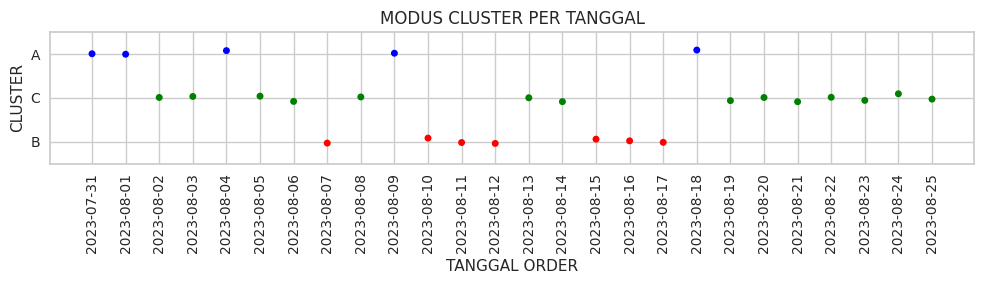

In [ ]:
# Convert 'TANGGAL ORDER' column to datetime
mode_df['TANGGAL ORDER'] = pd.to_datetime(mode_df['TANGGAL ORDER'])

# Set up the figure
plt.figure(figsize=(10, 3))

# Define the cluster colors
cluster_colors = {'A': 'blue', 'B': 'red', 'C': 'green'}

# Create a categorical scatter plot with custom colors
sns.stripplot(y='mode_cluster', x='TANGGAL ORDER', data=mode_df, jitter=True, marker='o', palette=cluster_colors)

# Add labels and title
plt.xlabel('TANGGAL ORDER')
plt.ylabel('CLUSTER')
plt.title('MODUS CLUSTER PER TANGGAL')

# Rotate x-axis labels vertically for better readability
plt.xticks(mean_df.index, rotation=90)

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()


Berdasarkan data scatterplot diatas, cluster harian paling banyak yaitu cluster C, yaitu secara rata-rata operasional tim cukup masih tergolong cukup baik walaupun dalam kondisi tertentu berada di cluster B terutama saat puncak terbanyak jumlah order sehingga mempengaruhi SLA proses maupun SLA pesanan.

# **5. KESIMPULAN**

**1. Kinerja Packer:**

  Ahmad memiliki kinerja paling baik di antara packer lainnya. Dia memiliki cluster C paling banyak, menunjukkan bahwa rata-rata resi yang dikerjakan oleh Ahmad memiliki SLA pesanan yang baik.
  Derio berada dalam cluster C dan B, namun lebih banyak di cluster C.
  Nana dan Putra berada dalam cluster A dan B, yang mengindikasikan bahwa tingkat SLA pesanan untuk resi yang mereka kerjakan cenderung lebih lama (2-3 hari).

**2. Kinerja Packer Putra:**

  Putra paling banyak menyelesaikan resi sebagai packer dibandingkan packer lainnya.
  Putra sering memerlukan waktu lebih lama untuk menyelesaikan resi karena banyaknya pesanan pada tanggal tertentu.

**3. Kinerja Packer Nana:**

  Nana memiliki performa yang mirip dengan Putra, namun dengan jumlah cluster B lebih sedikit.
  Nana memiliki kecepatan yang lebih rendah sebagai packer dibandingkan anggota lainnya.

**4. Kinerja Packer Ariq:**

  Ariq memiliki jumlah cluster B paling sedikit dan berada pada urutan terakhir sebagai packer.
  Ariq cenderung menyelesaikan resi dengan SLA pesanan yang baik karena jumlah pesanan yang tidak begitu banyak.

**5. Kombinasi Tim Picker dan Packer:**

  Ariq dan Ahmad sangat baik sebagai picker dengan SLA proses rata-rata 1 hari.
  Kombinasi tim packer Ahmad, Derio, dan Ariq menghasilkan jumlah SLA 'expected' terbanyak.
  Nana tidak lebih cepat sebagai picker dibandingkan dengan Ariq dan Ahmad.

**6. Kinerja Packer Putra (lanjutan):**

  Putra dominan di cluster B dalam kombinasi seluruh resi dari marketplace.
  Putra membutuhkan waktu dan tenaga lebih banyak dibandingkan packer lainnya, yang mempengaruhi SLA pesanan yang lebih rendah untuk resi yang dikerjakannya.

**7. Kinerja Picker dan Packer:**

  Ahmad terbaik di antara Ariq dan Nana sebagai picker karena tidak masuk dalam cluster B untuk semua resi dari marketplace.
  Ariq tidak baik dalam mengerjakan resi dari Tokopedia, sementara Nana tidak baik dalam mengerjakan resi dari Tiktok MCN.
  Kesimpulan umumnya adalah Ahmad memiliki performa terbaik sebagai packer, sementara Putra memiliki volume kerja yang tinggi tetapi mempengaruhi SLA pesanan. Nana dan Ariq memiliki performa yang lebih rendah baik sebagai packer maupun picker dalam beberapa situasi tertentu. Kombinasi tim packer Ahmad, Derio, dan Ariq cenderung menghasilkan SLA yang baik.

# **6. SARAN**

**1. Optimalisasi Kombinasi Tim:**

Mempertimbangkan untuk lebih sering menggabungkan Ahmad, Derio, dan Ariq sebagai tim packer, karena kombinasi ini menghasilkan jumlah SLA yang paling baik. Ini dapat membantu meningkatkan efisiensi dan kecepatan dalam menyelesaikan resi.

**2. Manajemen Beban Kerja Putra:**

Mengelola beban kerja Putra dengan lebih baik, terutama ketika terjadi lonjakan pesanan pada tanggal tertentu. Mungkin perlu dipertimbangkan untuk mengatur prioritas resi atau membagi tugas dengan packer lainnya untuk menjaga SLA pesanan tetap terjaga.

**3. Peningkatan Kinerja Nana dan Ariq:**

Memberikan pelatihan atau dukungan tambahan kepada Nana dan Ariq untuk meningkatkan kinerja mereka sebagai packer. Jika ada faktor tertentu yang mempengaruhi kecepatan mereka, perlu diidentifikasi dan dicari solusi untuk mengatasi masalah tersebut.

**4. Analisis Lebih Lanjut:**

Melakukan analisis lebih mendalam untuk mengidentifikasi penyebab yang mendasari performa yang rendah dari Nana dan Ariq sebagai picker dan packer. Mungkin ada faktor tertentu seperti jenis pesanan, kompleksitas produk, atau sistem kerja yang perlu diperbaiki.

**5. Peningkatan Proses:**

Menganalisis dan memperbarui proses kerja untuk memastikan efisiensi yang lebih baik. Hal ini dapat mencakup pemisahan tugas berdasarkan jenis pesanan atau pembuatan rencana kerja yang lebih terstruktur.

**6. Evaluasi SLA Pesanan:**

Memperbarui target SLA pesanan untuk masing-masing packer, dengan mempertimbangkan faktor-faktor seperti jumlah pesanan dan tingkat kompleksitas. Hal ini dapat membantu mengukur performa dengan lebih akurat.

**7. Pengembangan Tim:**

Memberikan peluang pengembangan kepada anggota tim dengan kinerja yang lebih rendah, seperti pelatihan tambahan atau kesempatan untuk berkolaborasi dengan anggota tim yang memiliki kinerja lebih baik.

**8. Pemantauan dan Umpan Balik:**

Melakukan pemantauan rutin terhadap kinerja setiap anggota tim picker dan packer, serta memberikan umpan balik yang konstruktif untuk membantu mereka meningkatkan performa.

**9. Rotasi Pekerjaan:**

Mengadopsi sistem rotasi pekerjaan di antara anggota tim untuk memperluas pengalaman dan keterampilan mereka dalam berbagai tugas, sehingga dapat mengoptimalkan efisiensi tim secara keseluruhan.

**10. Revaluasi Strategi:**

Melakukan evaluasi periodik terhadap strategi yang diambil dan memperbarui rencana kerja berdasarkan hasil pemantauan performa tim secara keseluruhan.